<center><h1>Gold Price Prediction</h1></center>
    <img src="gold price prediction.jpg" style="width:1000px;height:300px">

<a name = "Libraries"></a>
## 1. Import relevant libraries

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import tree
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingRegressor

<h3>Reading the csv data using pandas</h3>

In [36]:
df=pd.read_csv('Gold Price.csv', parse_dates=['Date'])
data=pd.DataFrame(df)

In [37]:
#Checking the data distribution
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [38]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,192.204570,1.098026e+08,18161.094398,18244.137842,18073.889095,18164.119043,18164.119043,1.779131e+08,28.276554,28.822555,27.653655,28.209302,27.783958,1.136074e+06,1.208494,1.208531,1.213360,1.203692,0.494761,77.504523,77.521740,78.384936,76.593894,225958.585565,0.498836,70.153097,70.275396,71.120256,69.330990,0.503492,43284.478463,43308.692084,43671.194412,42911.912107,26912.462165,0.480792,2.262769,2.263091,2.286512,2.238765,0.490105,1183.915425,1184.388853,1194.274622,1173.409692,0.484284,766.805122,766.363481,773.529302,759.444208,0.530850,1130.442375,89.809427,89.805442,90.098981,89.509331,27568.300349,0.512806,26.747427,27.071304,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,48.514161,4.925110e+07,3889.752079,3906.008604,3867.959072,3884.495887,3884.495887,1.212753e+08,20.325861,20.620624,19.972314,20.294635,19.721857,7.301289e+05,0.100535,0.100579,0.100184,0.100695,0.500118,27.400703,27.366113,27.393294,27.322868,88844.540581,0.500144,23.471514,23.480047,23.494737,23.422198,0.500133,7530.704012,7550.423242,7614.302267,7443.076538,21880.969122,0.499776,0.433469,0.433977,0.437574,0.429960,0.500048,273.842095,273.978168,275.427791,271.799909,0.499898,148.307189,148.078365,149.010291,147.381087,0.499193,570.012881,7.516115,7.520788,7.567895,7.459269,14643.314699,0.499982,10.620552,10.706388,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,104.468536,2.785650e+07,11769.209960,11925.879880,11735.190430,11766.259770,11766.259770,8.410000e+06,2.770000,2.850000,2.730000,2.800000,2.800000,1.645000e+05,1.038700,1.039000,1.041900,1.034100,0.000000,27.880000,27.990000,28.750000,27.100000,11520.000000,0.000000,26.550000,27.340000,27.610000,26.180000,0.000000,33170.000000,33146.000000,33566.000000,32626.000000,40.000000,0.000000,1.358000,1.366000,1.391000,1.321000,0.000000,775.600000,765.300000,786.500000,756.000000,0.000000,470.4500

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1718 non-null   datetime64[ns]
 1   Open           1718 non-null   float64       
 2   High           1718 non-null   float64       
 3   Low            1718 non-null   float64       
 4   Close          1718 non-null   float64       
 5   Adj Close      1718 non-null   float64       
 6   Volume         1718 non-null   int64         
 7   SP_open        1718 non-null   float64       
 8   SP_high        1718 non-null   float64       
 9   SP_low         1718 non-null   float64       
 10  SP_close       1718 non-null   float64       
 11  SP_Ajclose     1718 non-null   float64       
 12  SP_volume      1718 non-null   int64         
 13  DJ_open        1718 non-null   float64       
 14  DJ_high        1718 non-null   float64       
 15  DJ_low         1718 n

In [40]:
data.duplicated().value_counts()

False    1718
dtype: int64

In [41]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,192.204570,1.098026e+08,18161.094398,18244.137842,18073.889095,18164.119043,18164.119043,1.779131e+08,28.276554,28.822555,27.653655,28.209302,27.783958,1.136074e+06,1.208494,1.208531,1.213360,1.203692,0.494761,77.504523,77.521740,78.384936,76.593894,225958.585565,0.498836,70.153097,70.275396,71.120256,69.330990,0.503492,43284.478463,43308.692084,43671.194412,42911.912107,26912.462165,0.480792,2.262769,2.263091,2.286512,2.238765,0.490105,1183.915425,1184.388853,1194.274622,1173.409692,0.484284,766.805122,766.363481,773.529302,759.444208,0.530850,1130.442375,89.809427,89.805442,90.098981,89.509331,27568.300349,0.512806,26.747427,27.071304,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,48.514161,4.925110e+07,3889.752079,3906.008604,3867.959072,3884.495887,3884.495887,1.212753e+08,20.325861,20.620624,19.972314,20.294635,19.721857,7.301289e+05,0.100535,0.100579,0.100184,0.100695,0.500118,27.400703,27.366113,27.393294,27.322868,88844.540581,0.500144,23.471514,23.480047,23.494737,23.422198,0.500133,7530.704012,7550.423242,7614.302267,7443.076538,21880.969122,0.499776,0.433469,0.433977,0.437574,0.429960,0.500048,273.842095,273.978168,275.427791,271.799909,0.499898,148.307189,148.078365,149.010291,147.381087,0.499193,570.012881,7.516115,7.520788,7.567895,7.459269,14643.314699,0.499982,10.620552,10.706388,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,104.468536,2.785650e+07,11769.209960,11925.879880,11735.190430,11766.259770,11766.259770,8.410000e+06,2.770000,2.850000,2.730000,2.800000,2.800000,1.645000e+05,1.038700,1.039000,1.041900,1.034100,0.000000,27.880000,27.990000,28.750000,27.100000,11520.000000,0.000000,26.550000,27.340000,27.610000,26.180000,0.000000,33170.000000,33146.000000,33566.000000,32626.000000,40.000000,0.000000,1.358000,1.366000,1.391000,1.321000,0.000000,775.600000,765.300000,786.500000,756.000000,0.000000,470.4500

<h1>2. Exploratory Data Analysis</h1>

<h3>Numeric Distribution Plot</h3>

count                    1718
unique                   1718
top       2011-12-15 00:00:00
freq                        1
first     2011-12-15 00:00:00
last      2018-12-31 00:00:00
Name: Date, dtype: object


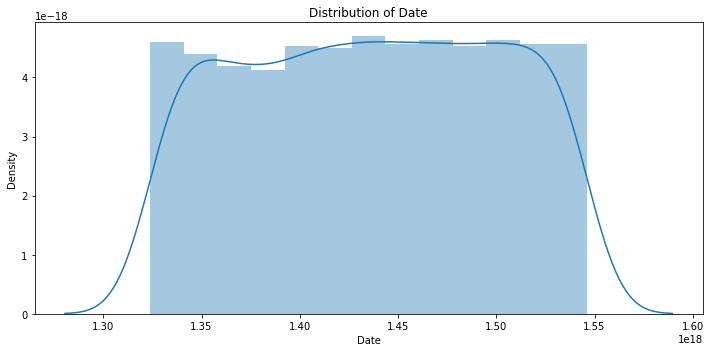

count    1718.000000
mean      127.323434
std        17.526993
min       100.919998
25%       116.220001
50%       121.915001
75%       128.427494
max       173.199997
Name: Open, dtype: float64


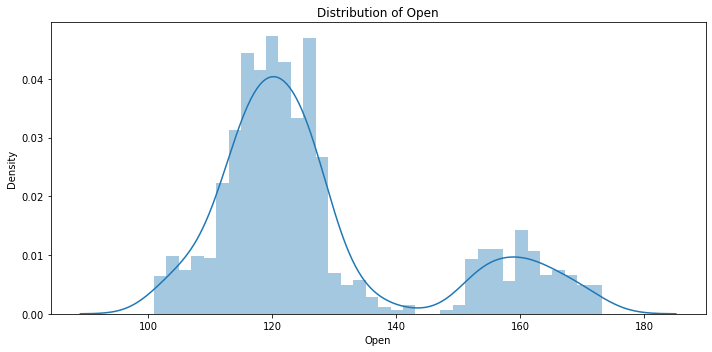

count    1718.000000
mean      127.854237
std        17.631189
min       100.989998
25%       116.540001
50%       122.325001
75%       129.087498
max       174.070007
Name: High, dtype: float64


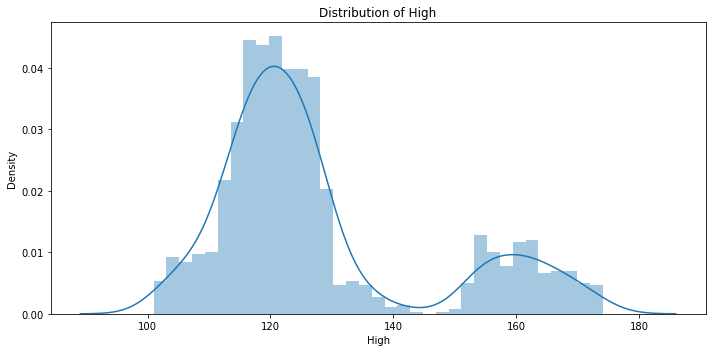

count    1718.000000
mean      126.777695
std        17.396513
min       100.230003
25%       115.739998
50%       121.369999
75%       127.840001
max       172.919998
Name: Low, dtype: float64


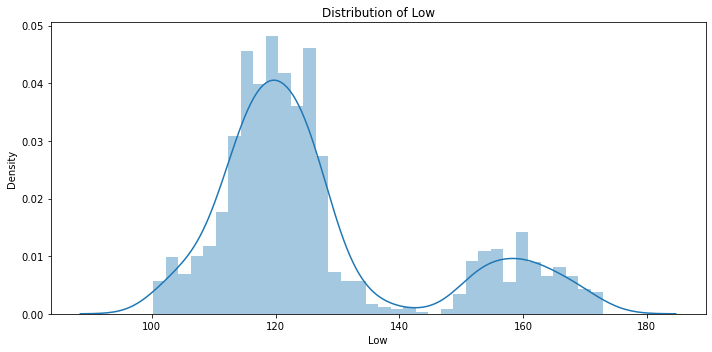

count    1718.000000
mean      127.319482
std        17.536269
min       100.500000
25%       116.052502
50%       121.795002
75%       128.470001
max       173.610001
Name: Close, dtype: float64


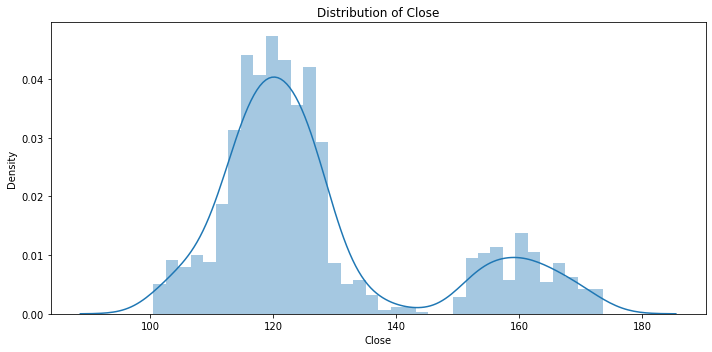

count    1718.000000
mean      127.319482
std        17.536269
min       100.500000
25%       116.052502
50%       121.795002
75%       128.470001
max       173.610001
Name: Adj Close, dtype: float64


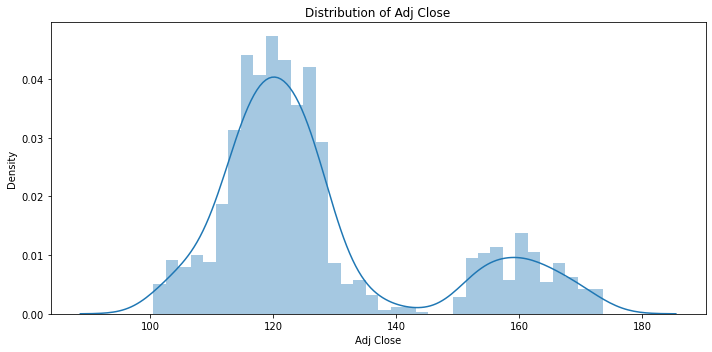

count    1.718000e+03
mean     8.446327e+06
std      4.920731e+06
min      1.501600e+06
25%      5.412925e+06
50%      7.483900e+06
75%      1.020795e+07
max      9.380420e+07
Name: Volume, dtype: float64


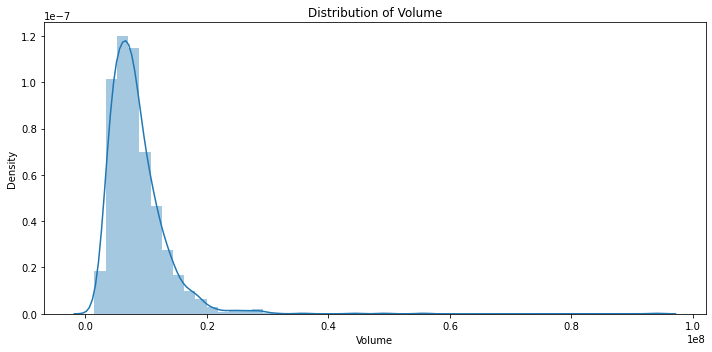

count    1718.000000
mean      204.490023
std        43.831928
min       122.059998
25%       170.392498
50%       205.464996
75%       237.292500
max       293.089996
Name: SP_open, dtype: float64


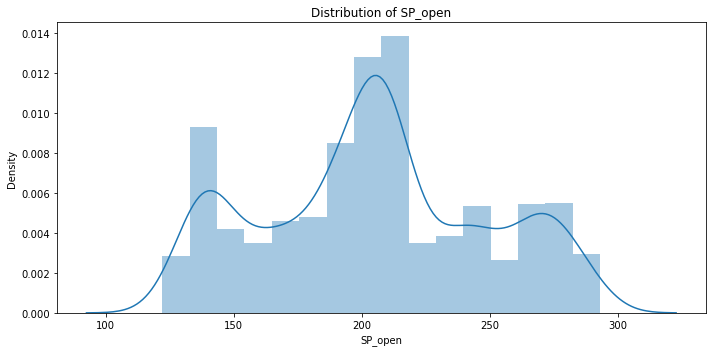

count    1718.000000
mean      205.372637
std        43.974644
min       122.320000
25%       170.962506
50%       206.459999
75%       237.722500
max       293.940002
Name: SP_high, dtype: float64


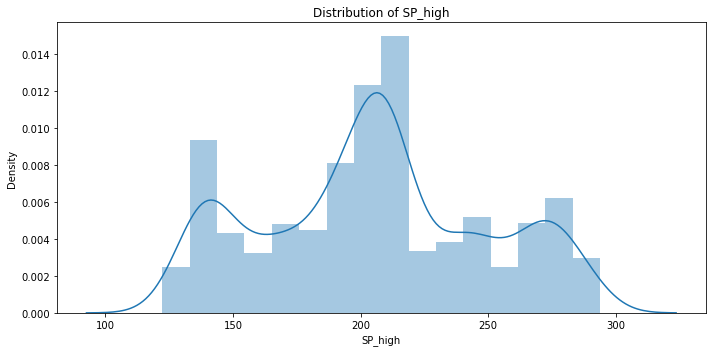

count    1718.000000
mean      203.487014
std        43.618940
min       120.029999
25%       169.577499
50%       204.430000
75%       236.147503
max       291.809998
Name: SP_low, dtype: float64


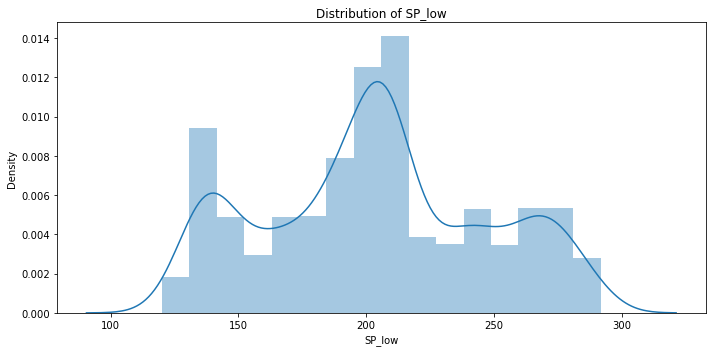

count    1718.000000
mean      204.491222
std        43.776999
min       120.290001
25%       170.397500
50%       205.529999
75%       236.889996
max       293.579987
Name: SP_close, dtype: float64


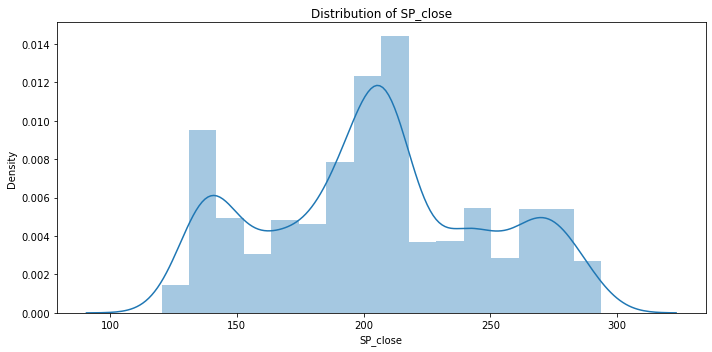

count    1718.000000
mean      192.204570
std        48.514161
min       104.468536
25%       153.027992
50%       191.658341
75%       228.721389
max       290.560242
Name: SP_Ajclose, dtype: float64


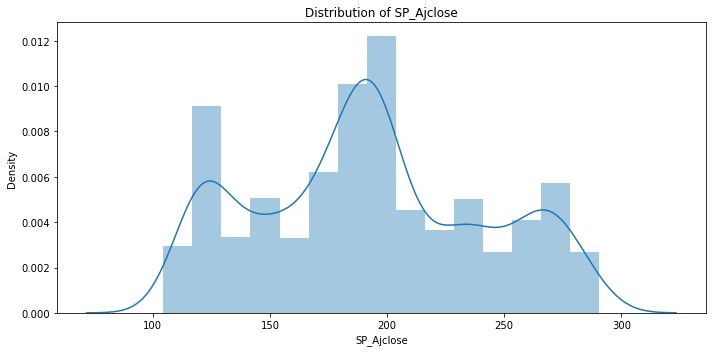

count    1.718000e+03
mean     1.098026e+08
std      4.925110e+07
min      2.785650e+07
25%      7.387085e+07
50%      9.972020e+07
75%      1.351161e+08
max      5.072443e+08
Name: SP_volume, dtype: float64


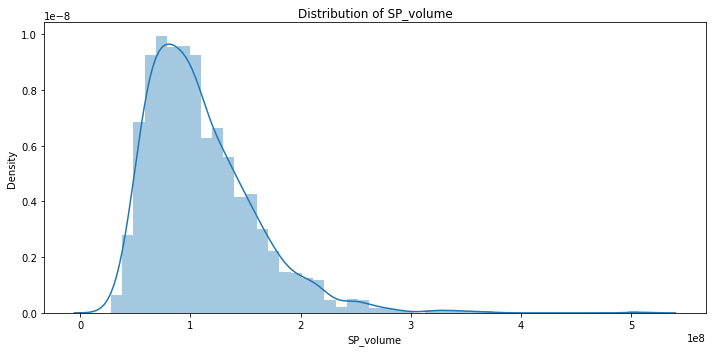

count     1718.000000
mean     18161.094398
std       3889.752079
min      11769.209960
25%      15487.930173
50%      17601.095705
75%      20866.907225
max      26833.470700
Name: DJ_open, dtype: float64


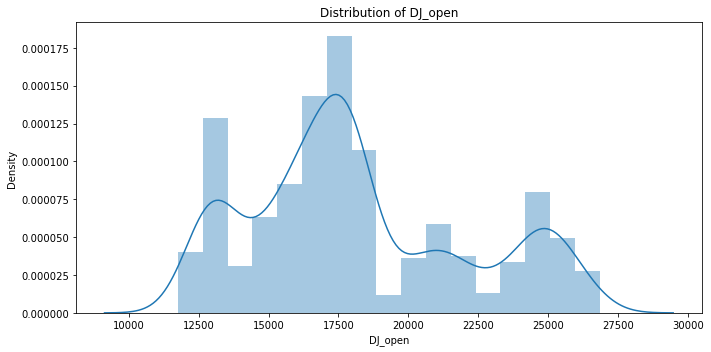

count     1718.000000
mean     18244.137842
std       3906.008604
min      11925.879880
25%      15551.170168
50%      17714.395510
75%      20910.837405
max      26951.810550
Name: DJ_high, dtype: float64


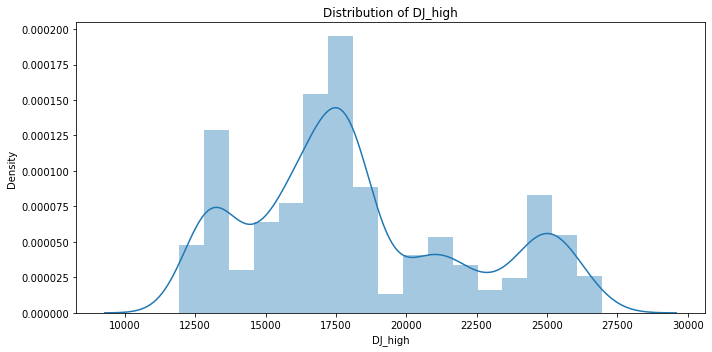

count     1718.000000
mean     18073.889095
std       3867.959072
min      11735.190430
25%      15419.387207
50%      17510.290040
75%      20785.035648
max      26789.080080
Name: DJ_low, dtype: float64


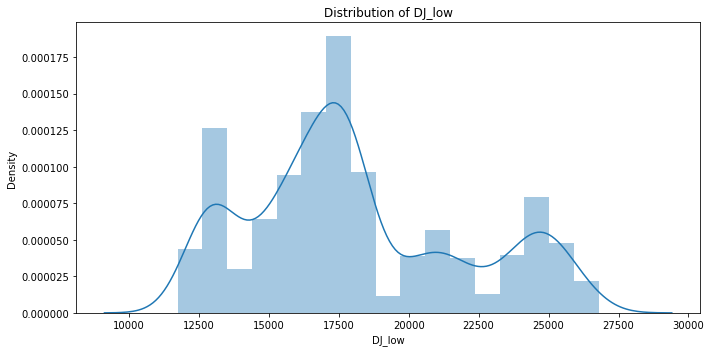

count     1718.000000
mean     18164.119043
std       3884.495887
min      11766.259770
25%      15495.665280
50%      17612.939455
75%      20851.157715
max      26828.390630
Name: DJ_close, dtype: float64


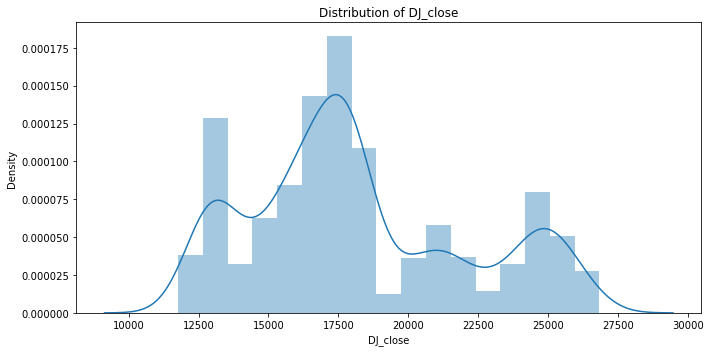

count     1718.000000
mean     18164.119043
std       3884.495887
min      11766.259770
25%      15495.665280
50%      17612.939455
75%      20851.157715
max      26828.390630
Name: DJ_Ajclose, dtype: float64


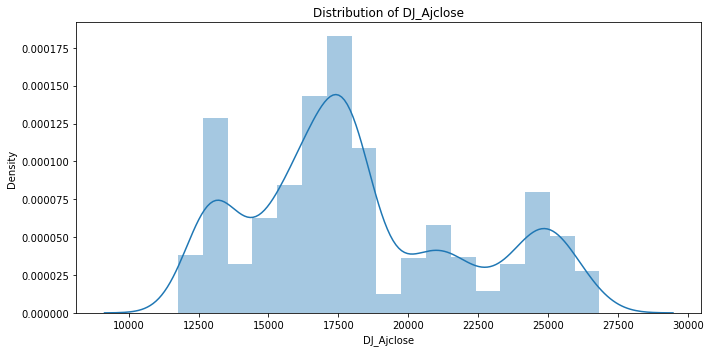

count    1.718000e+03
mean     1.779131e+08
std      1.212753e+08
min      8.410000e+06
25%      9.232000e+07
50%      1.206950e+08
75%      2.636300e+08
max      9.005100e+08
Name: DJ_volume, dtype: float64


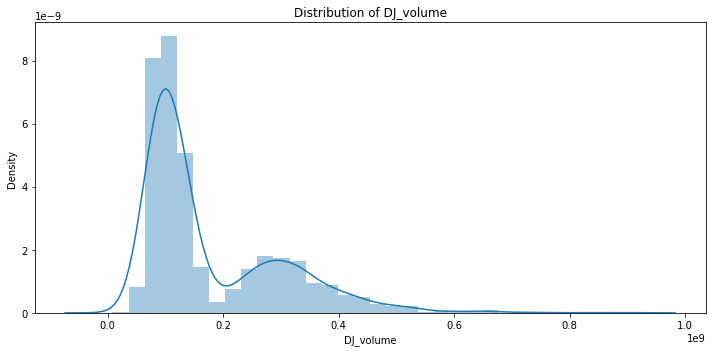

count    1718.000000
mean       28.276554
std        20.325861
min         2.770000
25%        14.200000
50%        22.800000
75%        37.150002
max        80.199997
Name: EG_open, dtype: float64


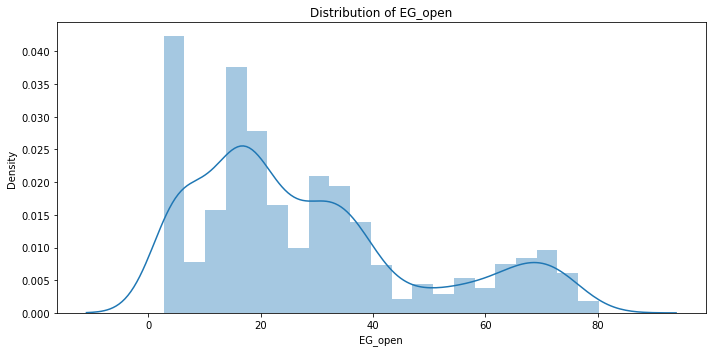

count    1718.000000
mean       28.822555
std        20.620624
min         2.850000
25%        14.550000
50%        23.125000
75%        37.849998
max        81.000000
Name: EG_high, dtype: float64


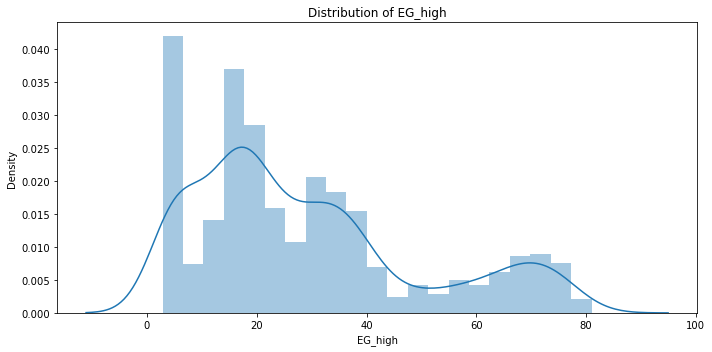

count    1718.000000
mean       27.653655
std        19.972314
min         2.730000
25%        13.762500
50%        21.800000
75%        36.450001
max        77.900002
Name: EG_low, dtype: float64


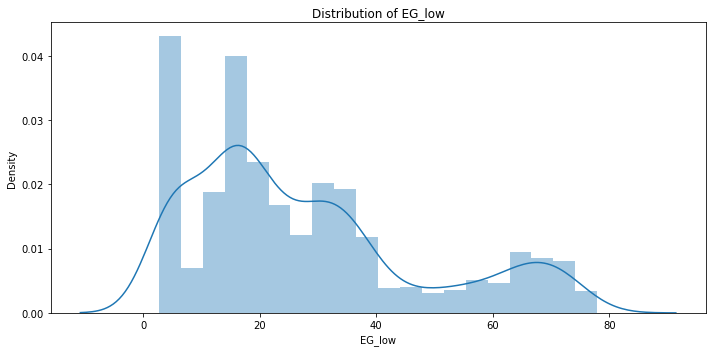

count    1718.000000
mean       28.209302
std        20.294635
min         2.800000
25%        14.150000
50%        22.524999
75%        37.187501
max        79.800003
Name: EG_close, dtype: float64


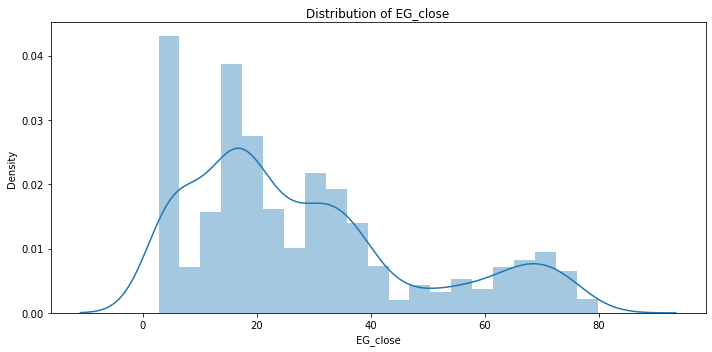

count    1718.000000
mean       27.783958
std        19.721857
min         2.800000
25%        14.082418
50%        22.408089
75%        36.811500
max        77.999313
Name: EG_Ajclose, dtype: float64


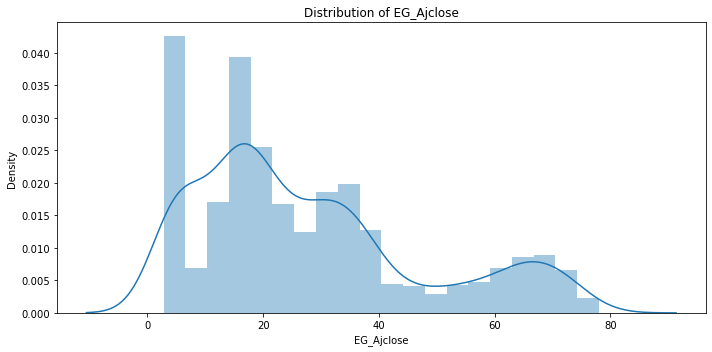

count    1.718000e+03
mean     1.136074e+06
std      7.301289e+05
min      1.645000e+05
25%      7.006250e+05
50%      9.688000e+05
75%      1.344775e+06
max      1.006120e+07
Name: EG_volume, dtype: float64


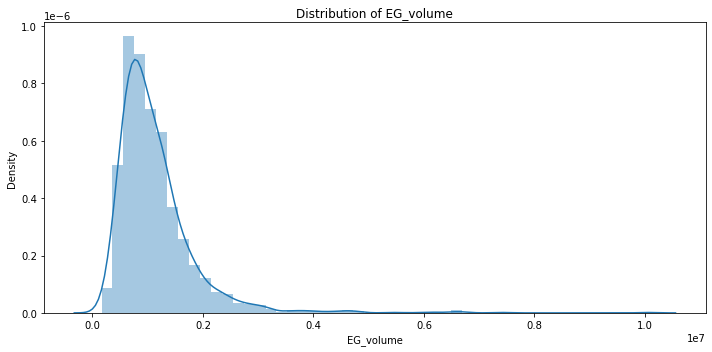

count    1718.000000
mean        1.208494
std         0.100535
min         1.038700
25%         1.120800
50%         1.184050
75%         1.305550
max         1.393400
Name: EU_Price, dtype: float64


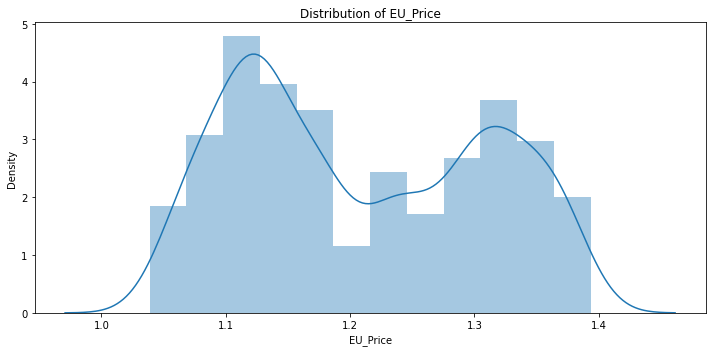

count    1718.000000
mean        1.208531
std         0.100579
min         1.039000
25%         1.120900
50%         1.184100
75%         1.305475
max         1.393300
Name: EU_open, dtype: float64


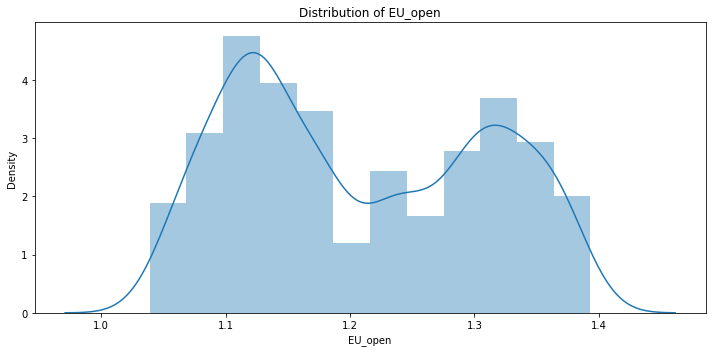

count    1718.000000
mean        1.213360
std         0.100184
min         1.041900
25%         1.125800
50%         1.187850
75%         1.310275
max         1.399300
Name: EU_high, dtype: float64


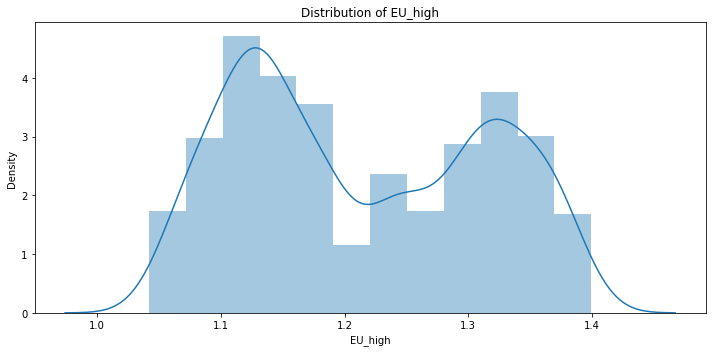

count    1718.000000
mean        1.203692
std         0.100695
min         1.034100
25%         1.115900
50%         1.179450
75%         1.299850
max         1.391000
Name: EU_low, dtype: float64


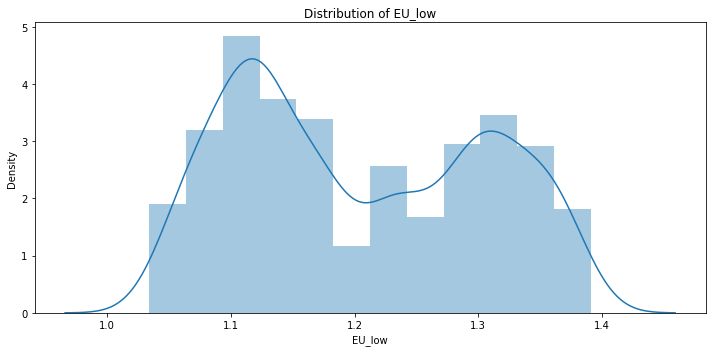

count    1718.000000
mean        0.494761
std         0.500118
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: EU_Trend, dtype: float64


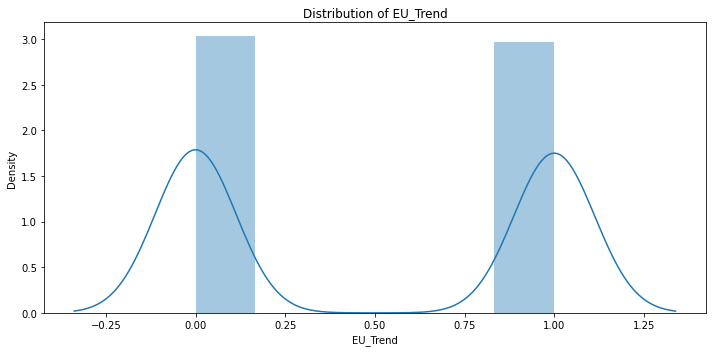

count    1718.000000
mean       77.504523
std        27.400703
min        27.880000
25%        52.152500
50%        70.115000
75%       107.730000
max       126.220000
Name: OF_Price, dtype: float64


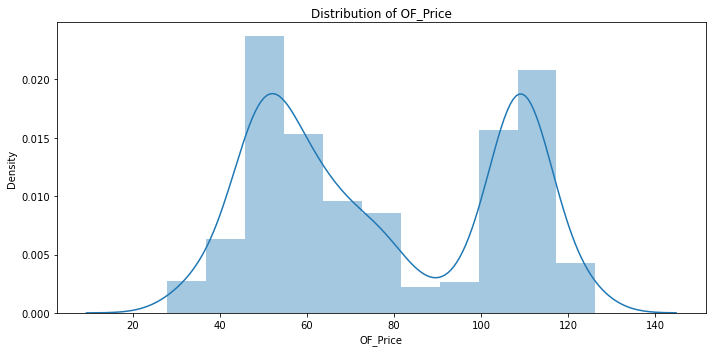

count    1718.000000
mean       77.521740
std        27.366113
min        27.990000
25%        52.202500
50%        70.090000
75%       107.682500
max       126.160000
Name: OF_Open, dtype: float64


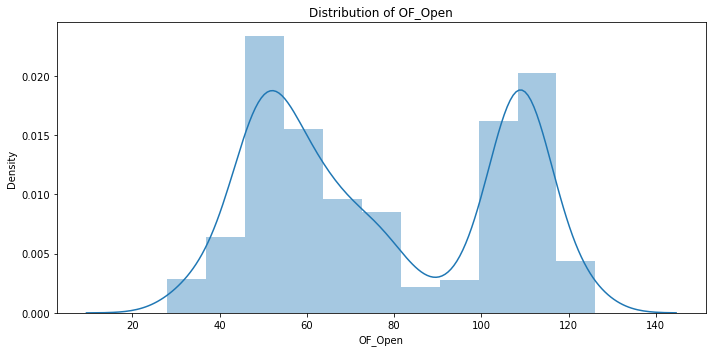

count    1718.000000
mean       78.384936
std        27.393294
min        28.750000
25%        52.862500
50%        70.790000
75%       108.447500
max       128.400000
Name: OF_High, dtype: float64


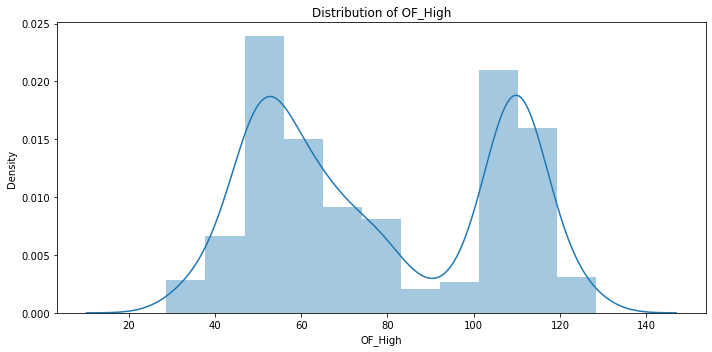

count    1718.000000
mean       76.593894
std        27.322868
min        27.100000
25%        51.362500
50%        69.035000
75%       106.865000
max       125.000000
Name: OF_Low, dtype: float64


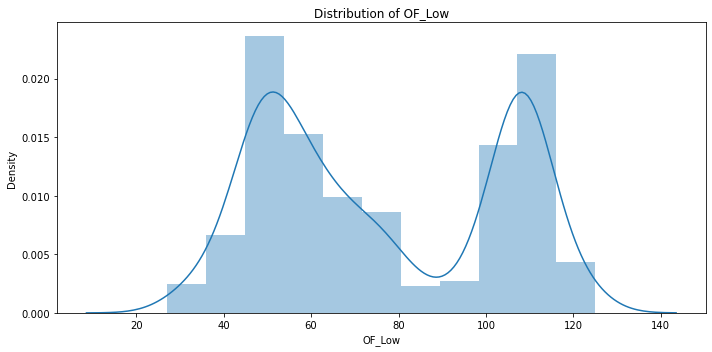

count      1718.000000
mean     225958.585565
std       88844.540581
min       11520.000000
25%      175940.000000
50%      223485.000000
75%      281382.500000
max      567760.000000
Name: OF_Volume, dtype: float64


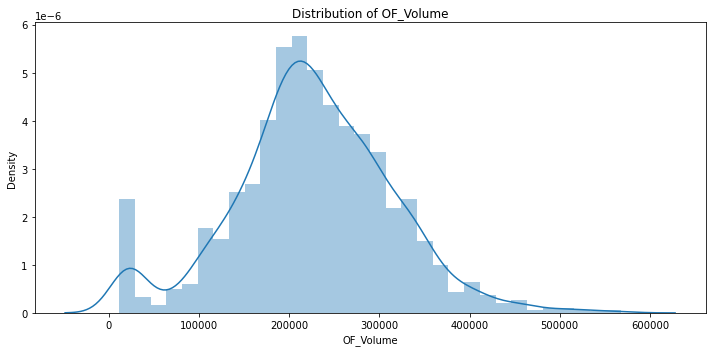

count    1718.000000
mean        0.498836
std         0.500144
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OF_Trend, dtype: float64


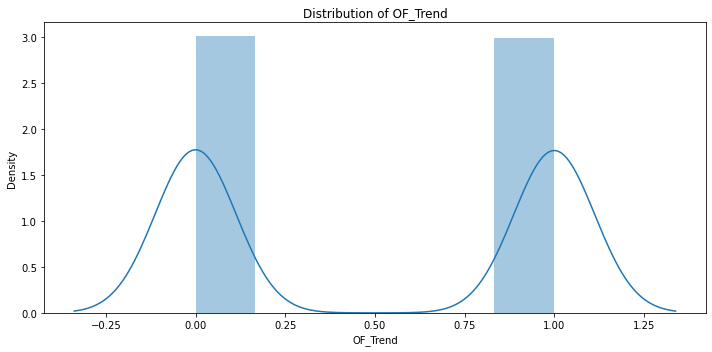

count    1718.000000
mean       70.153097
std        23.471514
min        26.550000
25%        48.922500
50%        64.680000
75%        94.280000
max       110.300000
Name: OS_Price, dtype: float64


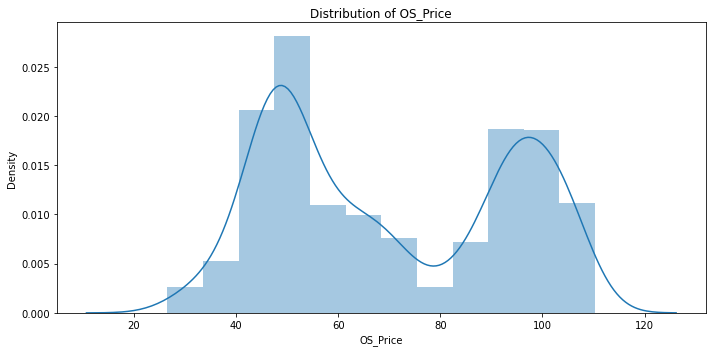

count    1718.000000
mean       70.275396
std        23.480047
min        27.340000
25%        49.030000
50%        64.840000
75%        94.425000
max       110.340000
Name: OS_Open, dtype: float64


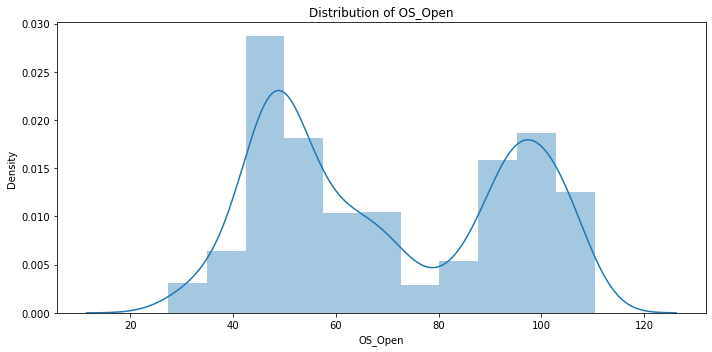

count    1718.000000
mean       71.120256
std        23.494737
min        27.610000
25%        49.692500
50%        65.565000
75%        95.390000
max       112.280000
Name: OS_High, dtype: float64


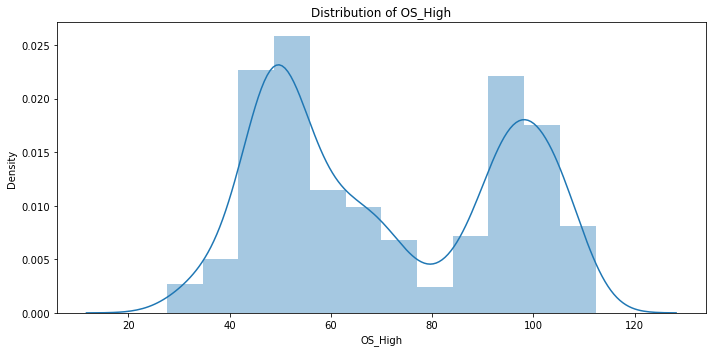

count    1718.000000
mean       69.330990
std        23.422198
min        26.180000
25%        48.200000
50%        63.755000
75%        93.475000
max       109.150000
Name: OS_Low, dtype: float64


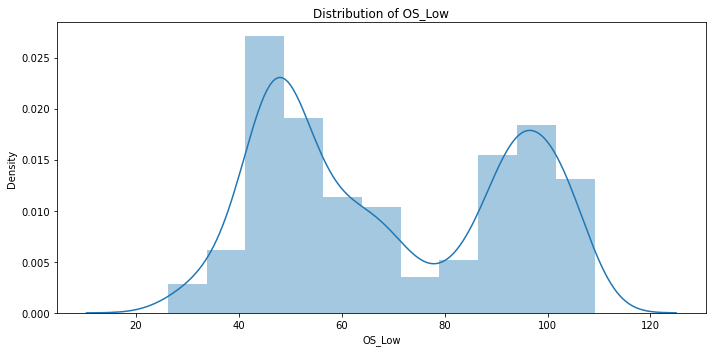

count    1718.000000
mean        0.503492
std         0.500133
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OS_Trend, dtype: float64


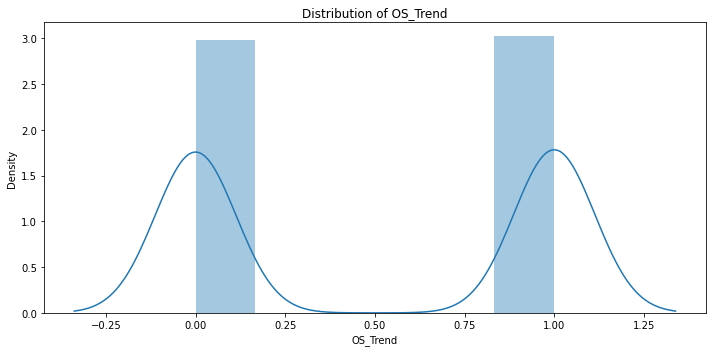

count     1718.000000
mean     43284.478463
std       7530.704012
min      33170.000000
25%      38018.750000
50%      40521.500000
75%      46580.500000
max      65292.000000
Name: SF_Price, dtype: float64


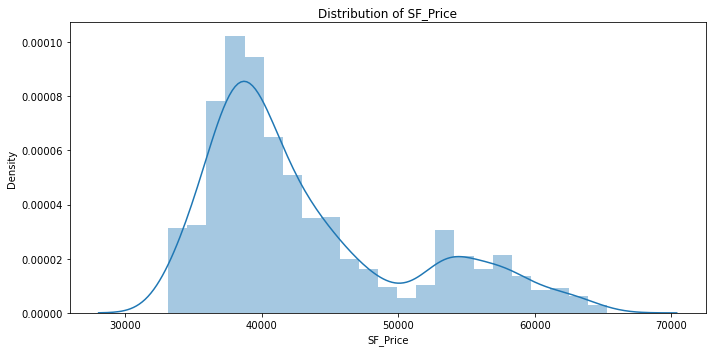

count     1718.000000
mean     43308.692084
std       7550.423242
min      33146.000000
25%      38028.750000
50%      40528.000000
75%      46661.250000
max      65400.000000
Name: SF_Open, dtype: float64


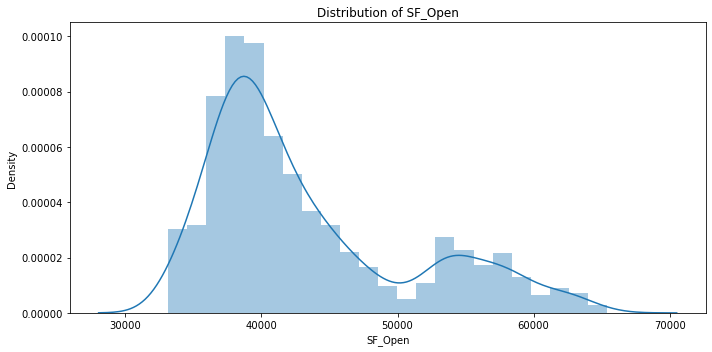

count     1718.000000
mean     43671.194412
std       7614.302267
min      33566.000000
25%      38293.500000
50%      40841.000000
75%      47071.000000
max      65723.000000
Name: SF_High, dtype: float64


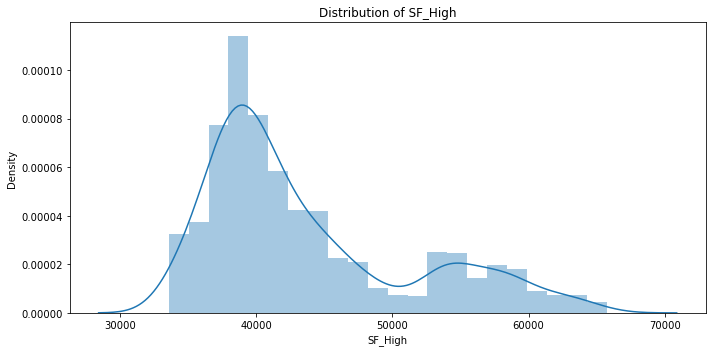

count     1718.000000
mean     42911.912107
std       7443.076538
min      32626.000000
25%      37690.250000
50%      40239.000000
75%      46133.250000
max      64132.000000
Name: SF_Low, dtype: float64


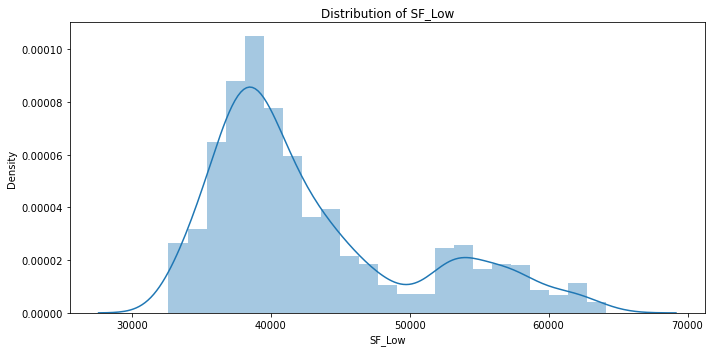

count      1718.000000
mean      26912.462165
std       21880.969122
min          40.000000
25%       14210.000000
50%       19645.000000
75%       29915.000000
max      203730.000000
Name: SF_Volume, dtype: float64


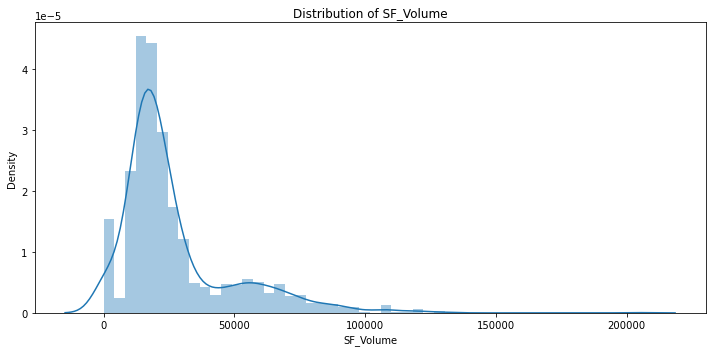

count    1718.000000
mean        0.480792
std         0.499776
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: SF_Trend, dtype: float64


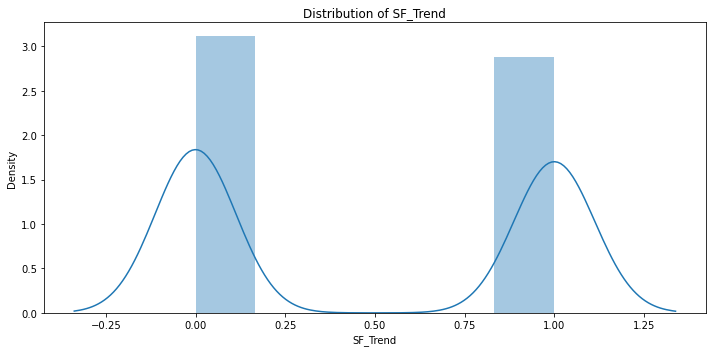

count    1718.000000
mean        2.262769
std         0.433469
min         1.358000
25%         1.905250
50%         2.259000
75%         2.597000
max         3.239000
Name: USB_Price, dtype: float64


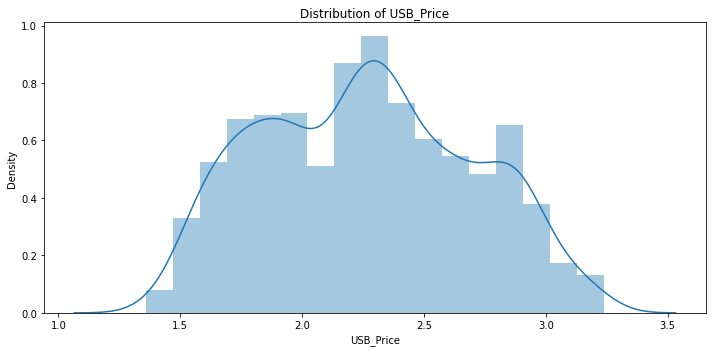

count    1718.000000
mean        2.263091
std         0.433977
min         1.366000
25%         1.905000
50%         2.259000
75%         2.597750
max         3.237000
Name: USB_Open, dtype: float64


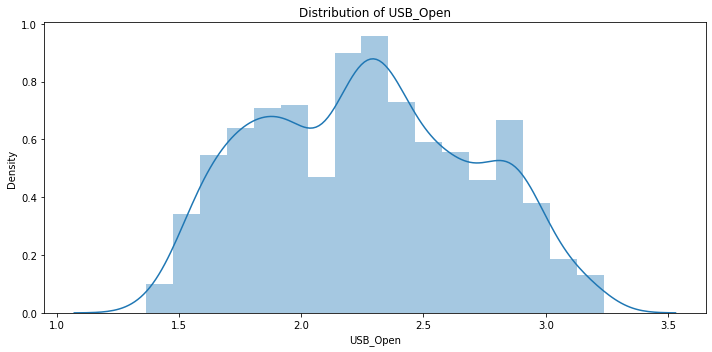

count    1718.000000
mean        2.286512
std         0.437574
min         1.391000
25%         1.920250
50%         2.290000
75%         2.620000
max         3.261000
Name: USB_High, dtype: float64


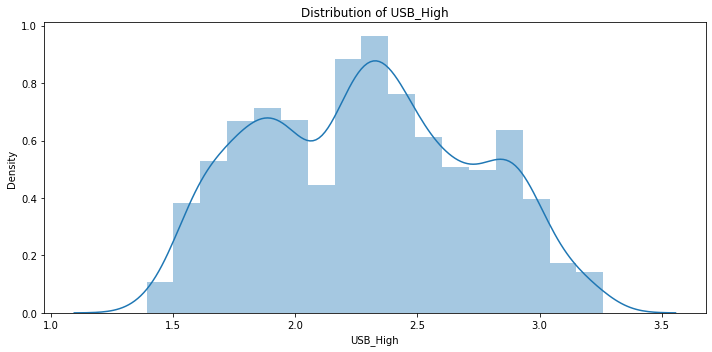

count    1718.000000
mean        2.238765
std         0.429960
min         1.321000
25%         1.886250
50%         2.230000
75%         2.575000
max         3.231000
Name: USB_Low, dtype: float64


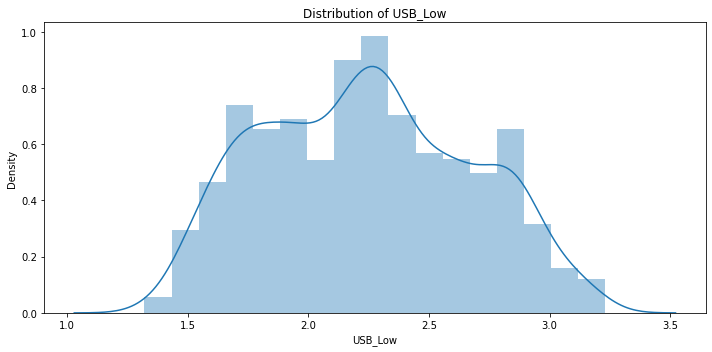

count    1718.000000
mean        0.490105
std         0.500048
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: USB_Trend, dtype: float64


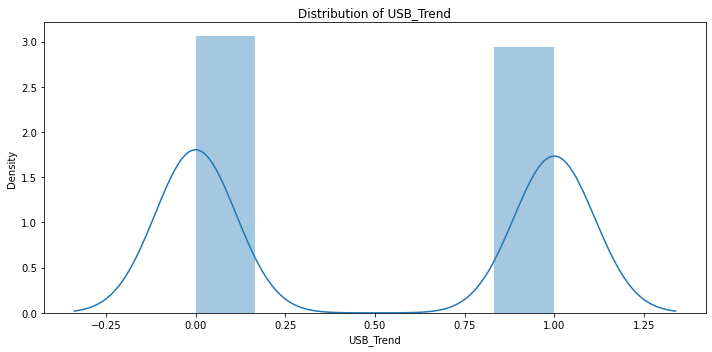

count    1718.000000
mean     1183.915425
std       273.842095
min       775.600000
25%       944.075000
50%      1098.025000
75%      1442.862500
max      1737.600000
Name: PLT_Price, dtype: float64


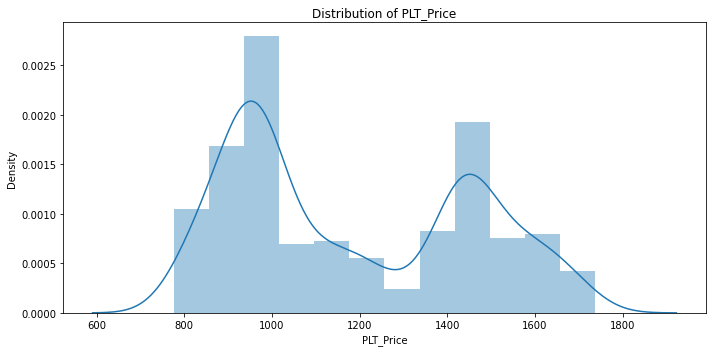

count    1718.000000
mean     1184.388853
std       273.978168
min       765.300000
25%       944.025000
50%      1098.175000
75%      1442.812500
max      1737.800000
Name: PLT_Open, dtype: float64


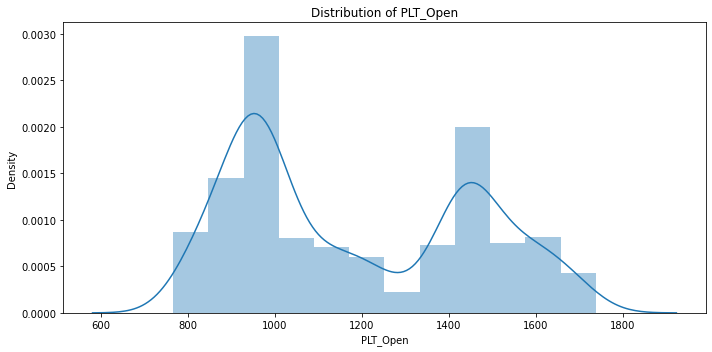

count    1718.000000
mean     1194.274622
std       275.427791
min       786.500000
25%       952.650000
50%      1107.525000
75%      1454.287500
max      1742.900000
Name: PLT_High, dtype: float64


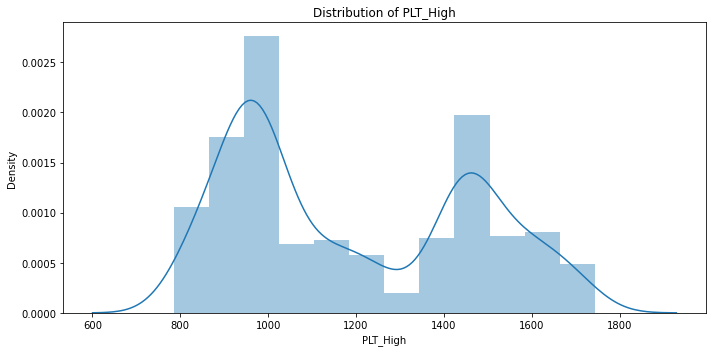

count    1718.000000
mean     1173.409692
std       271.799909
min       756.000000
25%       935.850000
50%      1086.550000
75%      1432.087500
max      1717.150000
Name: PLT_Low, dtype: float64


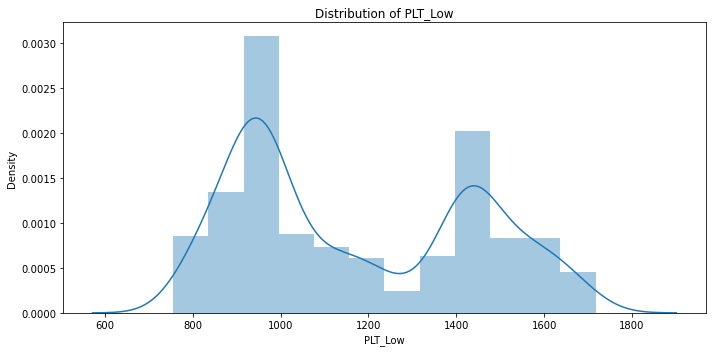

count    1718.000000
mean        0.484284
std         0.499898
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: PLT_Trend, dtype: float64


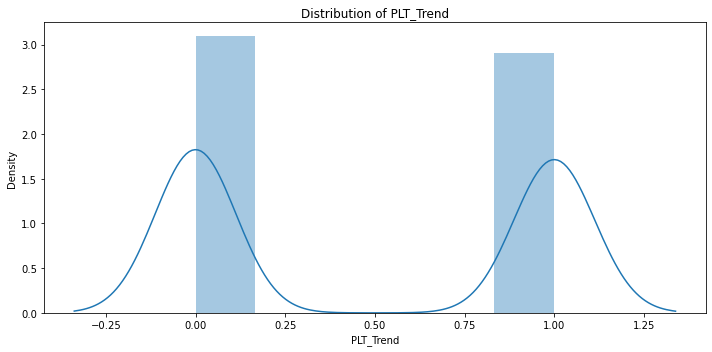

count    1718.000000
mean      766.805122
std       148.307189
min       470.450000
25%       663.212500
50%       748.300000
75%       848.200000
max      1197.500000
Name: PLD_Price, dtype: float64


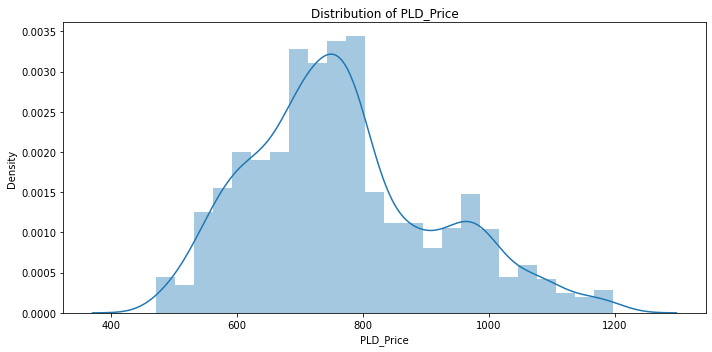

count    1718.000000
mean      766.363481
std       148.078365
min       458.600000
25%       663.287500
50%       748.000000
75%       846.700000
max      1196.000000
Name: PLD_Open, dtype: float64


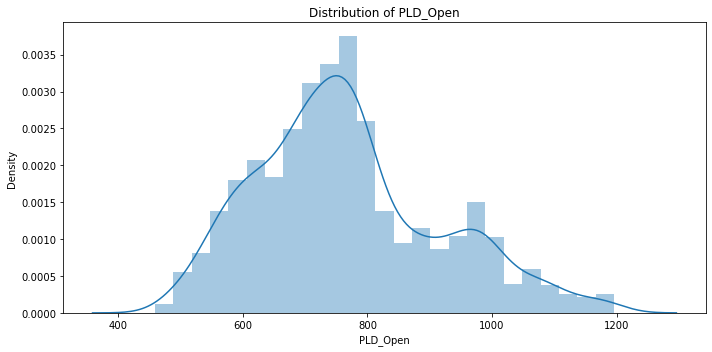

count    1718.000000
mean      773.529302
std       149.010291
min       473.150000
25%       670.162500
50%       753.800000
75%       855.600000
max      1208.700000
Name: PLD_High, dtype: float64


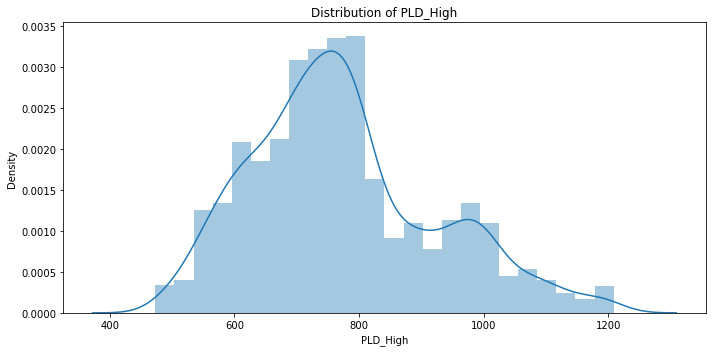

count    1718.000000
mean      759.444208
std       147.381087
min       458.600000
25%       657.025000
50%       742.450000
75%       840.112500
max      1183.600000
Name: PLD_Low, dtype: float64


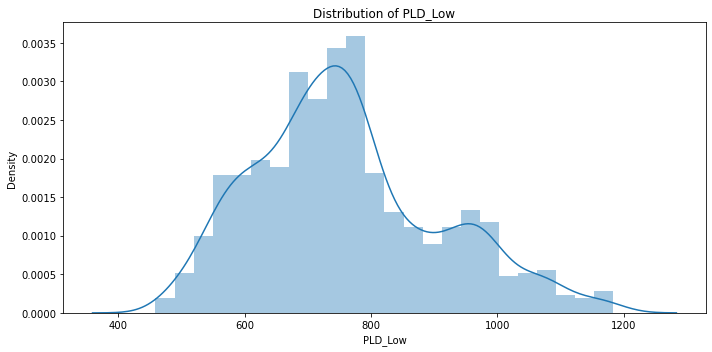

count    1718.000000
mean        0.530850
std         0.499193
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PLD_Trend, dtype: float64


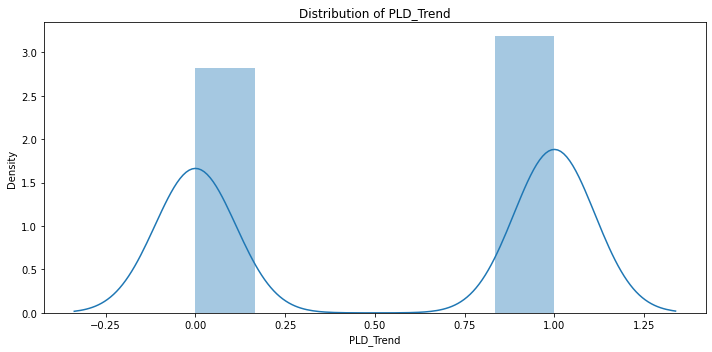

count    1718.000000
mean     1130.442375
std       570.012881
min         0.000000
25%       785.000000
50%      1100.000000
75%      1307.500000
max      2600.000000
Name: RHO_PRICE, dtype: float64


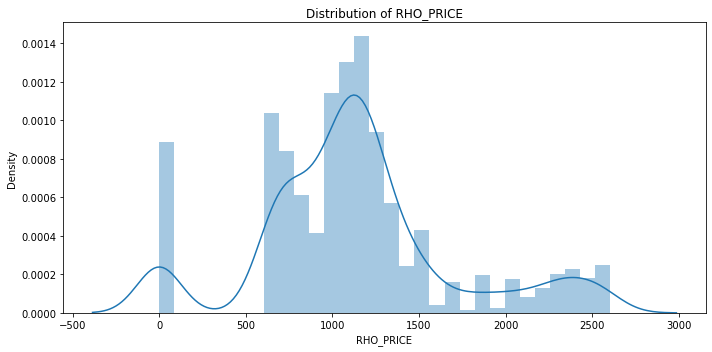

count    1718.000000
mean       89.809427
std         7.516115
min        78.300000
25%        81.380250
50%        92.883500
75%        96.103750
max       103.288000
Name: USDI_Price, dtype: float64


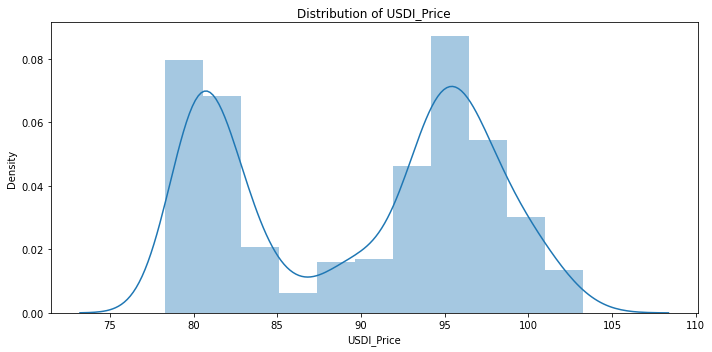

count    1718.000000
mean       89.805442
std         7.520788
min        78.220000
25%        81.380000
50%        92.905000
75%        96.115000
max       103.350000
Name: USDI_Open, dtype: float64


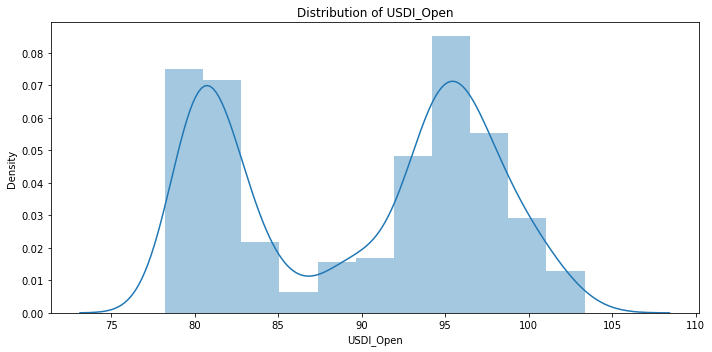

count    1718.000000
mean       90.098981
std         7.567895
min        78.640000
25%        81.617500
50%        93.155000
75%        96.472500
max       103.815000
Name: USDI_High, dtype: float64


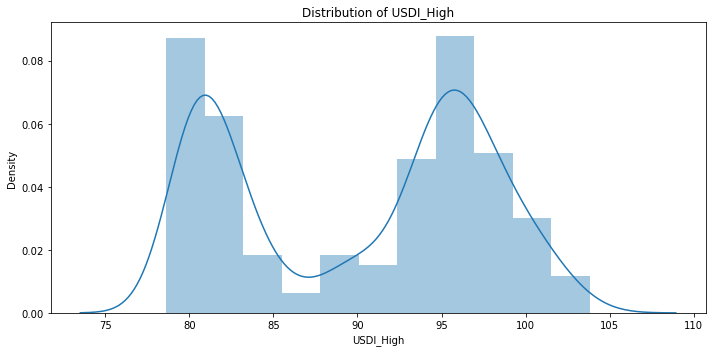

count    1718.000000
mean       89.509331
std         7.459269
min        78.120000
25%        81.111250
50%        92.572500
75%        95.730000
max       102.975000
Name: USDI_Low, dtype: float64


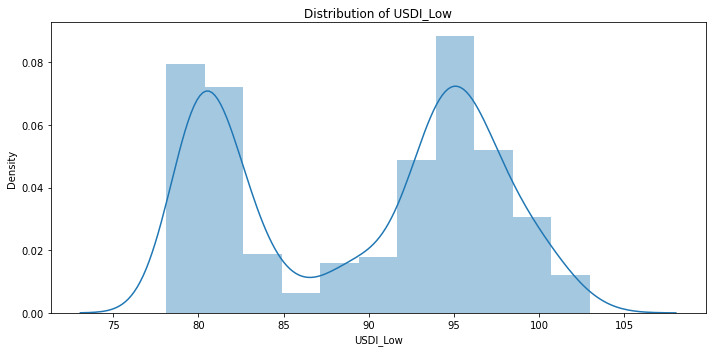

count      1718.000000
mean      27568.300349
std       14643.314699
min          60.000000
25%       18137.500000
50%       24445.000000
75%       33745.000000
max      142820.000000
Name: USDI_Volume, dtype: float64


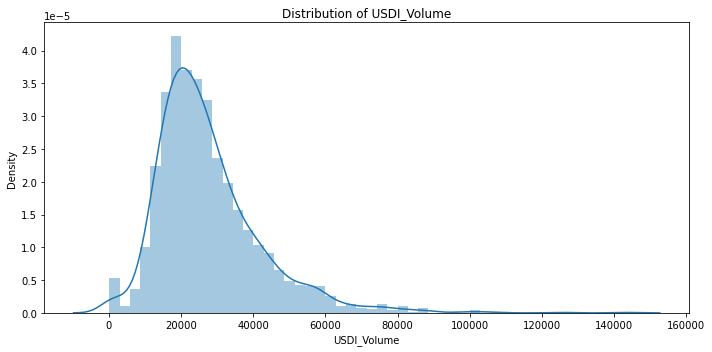

count    1718.000000
mean        0.512806
std         0.499982
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: USDI_Trend, dtype: float64


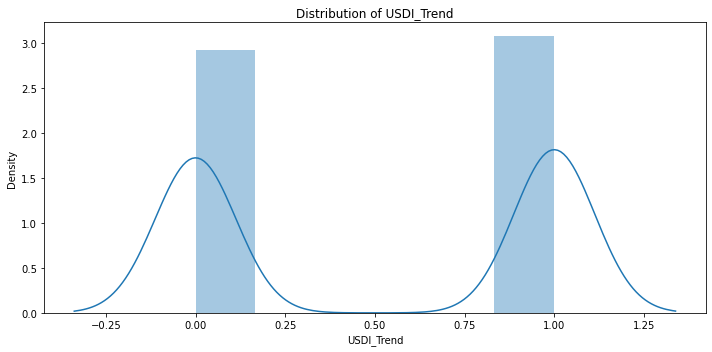

count    1718.000000
mean       26.747427
std        10.620552
min        12.700000
25%        20.642499
50%        23.115001
75%        27.430001
max        57.520000
Name: GDX_Open, dtype: float64


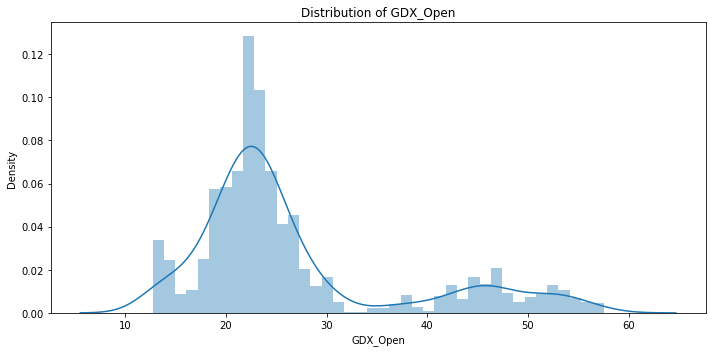

count    1718.000000
mean       27.071304
std        10.706388
min        12.920000
25%        20.952500
50%        23.370001
75%        27.770000
max        57.939999
Name: GDX_High, dtype: float64


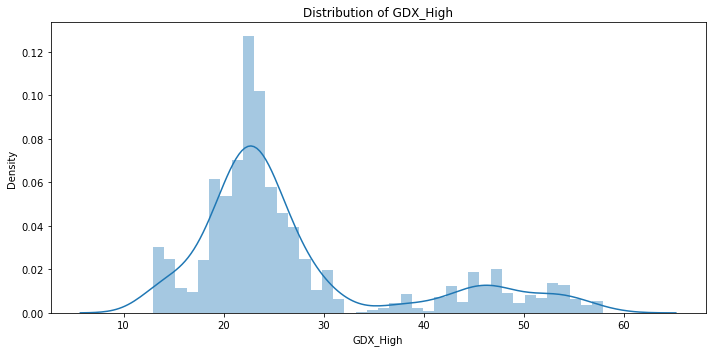

count    1718.000000
mean       26.384575
std        10.490908
min        12.400000
25%        20.355000
50%        22.870001
75%        26.797500
max        56.770000
Name: GDX_Low, dtype: float64


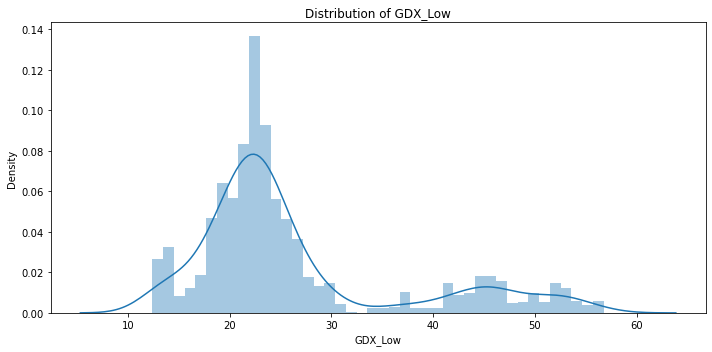

count    1718.000000
mean       26.715012
std        10.603110
min        12.470000
25%        20.585000
50%        23.054999
75%        27.317500
max        57.470001
Name: GDX_Close, dtype: float64


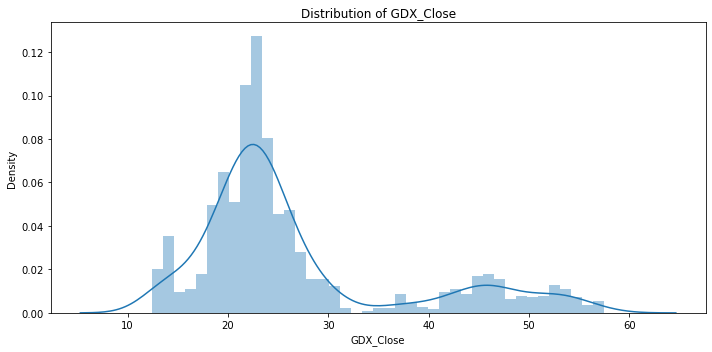

count    1718.000000
mean       25.924624
std         9.886570
min        12.269618
25%        20.180950
50%        22.677604
75%        26.478154
max        54.617039
Name: GDX_Adj Close, dtype: float64


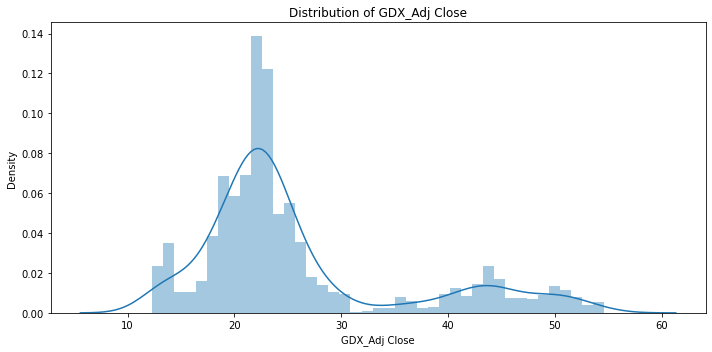

count    1.718000e+03
mean     4.356515e+07
std      2.909151e+07
min      4.729000e+06
25%      2.259968e+07
50%      3.730465e+07
75%      5.697055e+07
max      2.321536e+08
Name: GDX_Volume, dtype: float64


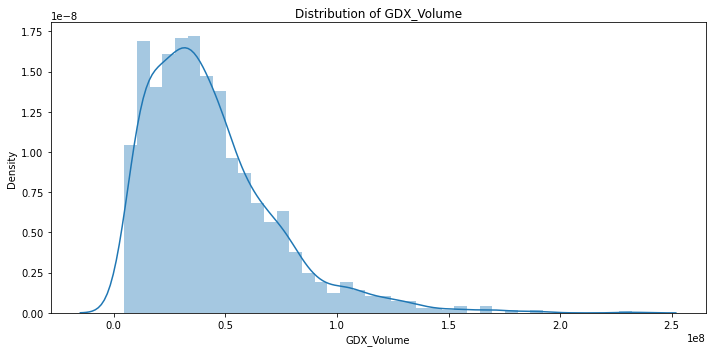

count    1718.000000
mean       22.113417
std        11.431056
min         7.820000
25%        11.420000
50%        16.450000
75%        34.419998
max        41.599998
Name: USO_Open, dtype: float64


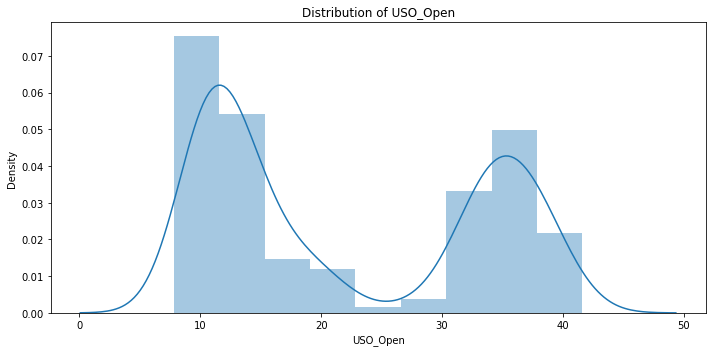

count    1718.000000
mean       22.307148
std        11.478671
min         8.030000
25%        11.500000
50%        16.635001
75%        34.667499
max        42.299999
Name: USO_High, dtype: float64


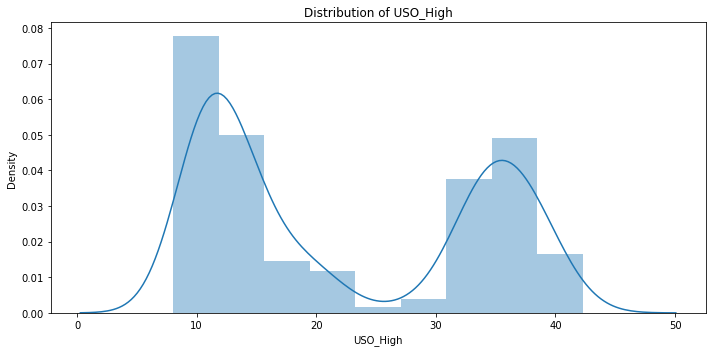

count    1718.000000
mean       21.904657
std        11.373997
min         7.670000
25%        11.300000
50%        16.040000
75%        34.110000
max        41.299999
Name: USO_Low, dtype: float64


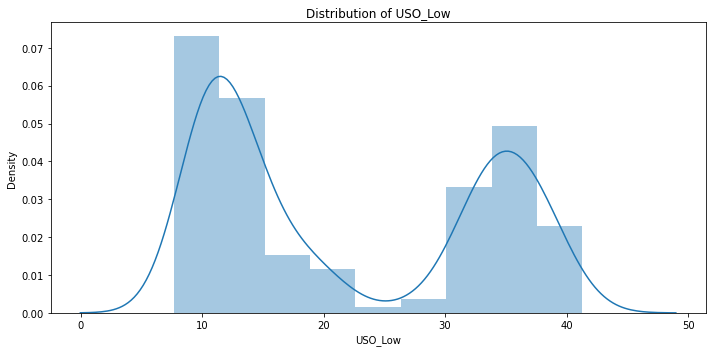

count    1718.000000
mean       22.109051
std        11.432787
min         7.960000
25%        11.392500
50%        16.345000
75%        34.417499
max        42.009998
Name: USO_Close, dtype: float64


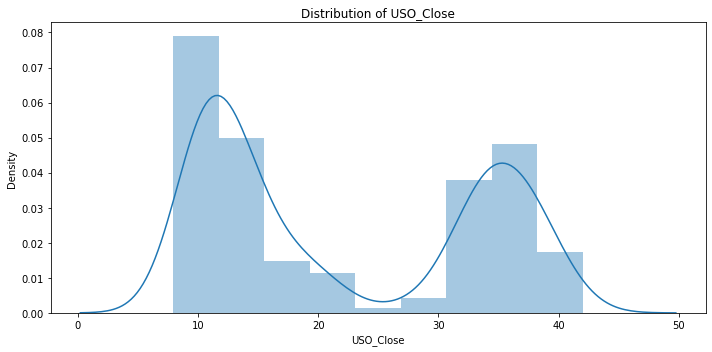

count    1718.000000
mean       22.109051
std        11.432787
min         7.960000
25%        11.392500
50%        16.345000
75%        34.417499
max        42.009998
Name: USO_Adj Close, dtype: float64


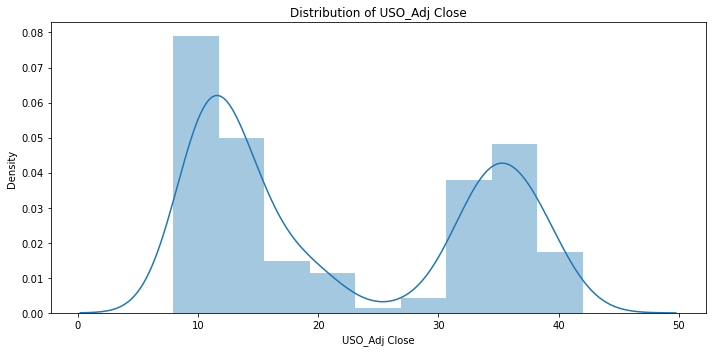

count    1.718000e+03
mean     1.922313e+07
std      1.575743e+07
min      1.035100e+06
25%      6.229500e+06
50%      1.613015e+07
75%      2.672375e+07
max      1.102657e+08
Name: USO_Volume, dtype: float64


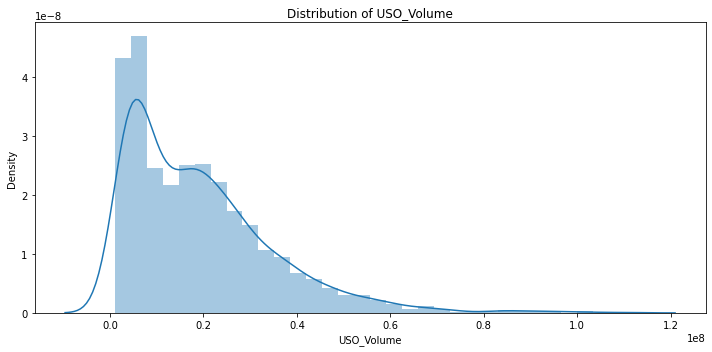

In [42]:
def numeric_distribution_plot(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(10,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col])
            plt.tight_layout()
            plt.show()
            
numeric_distribution_plot(df)

In [43]:
#Plotting the correlation
df.corr()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Open,1.000000,0.999515,0.999442,0.998976,0.998976,0.251921,-0.684314,-0.684597,-0.683464,-0.683998,-0.665788,0.242265,-0.588615,-0.588534,-0.587941,-0.588179,-0.588179,-0.155915,0.863226,0.861273,0.863740,0.862066,0.859143,-0.127269,0.580586,0.579304,0.582948,0.577043,0.010250,0.710348,0.708938,0.711079,0.708038,-0.225405,0.045286,0.630270,0.629795,0.631616,0.628710,0.056485,0.946923,0.946454,0.945632,0.948152,0.708413,0.017132,-0.441423,-0.441780,-0.464759,-0.417975,-0.018419,0.775265,0.774171,0.775528,0.774047,-0.002555,-0.213162,-0.215840,-0.217142,-0.214507,0.018274,0.096399,-0.721133,-0.720350,-0.720013,-0.721968,-0.207064,-0.007063,0.975510,0.975143,0.975479,0.974596,0.974098,-0.514230,0.634872,0.634864,0.634277,0.635138,0.635138,-0.455920
High,0.999515,1.000000,0.999262,0.999535,0.999535,0.261064,-0.688118,-0.688365,-0.687325,-0.687817,-0.669657,0.247883,-0.592459,-0.592376,-0.591864,-0.592072,-0.592072,-0.157978,0.864864,0.863336,0.865556,0.864276,0.861358,-0.124106,0.581787,0.580143,0.584050,0.577891,0.015209,0.711245,0.709720,0.711967,0.708806,-0.225274,0.046764,0.631470,0.630847,0.632808,0.629749,0.058236,0.947434,0.946187,0.945888,0.947901,0.712873,0.023581,-0.443377,-0.443266,-0.466330,-0.419765,-0.021915,0.777601,0.775989,0.777677,0.775923,0.004889,-0.216981,-0.219974,-0.221115,-0.218568,0.022405,0.093272,-0.722573,-0.721454,-0.721134,-0.723371,-0.201262,-0.011713,0.975429,0.975722,0.975650,0.975341,0.974746,-0.508782,0.637101,0.637208,0.636538,0.637483,0.637483,-0.454913
Low,0.999442,0.999262,1.000000,0.999532,0.999532,0.237031,-0.680911,-0.681242,-0.679988,-0.680567,-0.662325,0.235838,-0.585021,-0.585009,-0.584304,-0.584592,-0.584592,-0.153442,0.861282,0.859493,0.862220,0.860614,0.857697,-0.129967,0.580633,0.578906,0.582613,0.576936,0.016249,0.710616,0.709057,0.711224,0.708290,-0.225901,0.047973,0.630436,0.629721,0.631587,0.628832,0.058875,0.947373,0.946032,0.945280,0.948437,0.701648,0.023881,-0.438559,-0.438496,-0.461766,-0.414710,-0.022045,0.774112,0.772421,0.773877,0.772672,0.005959,-0.208824,-0.211947,-0.213075,-0.210420,0.024138,0.098648,-0.720684,-0.719513,-0.719438,-0.721184,-0.212337,-0.013227,0.974725,0.974587,0.975337,0.974568,0.974182,-0.519988,0.633591,0.633623,0.633140,0.633994,0.633994,-0.457628
Close,0.998976,0.999535,0.999532,1.000000,1.000000,0.246778,-0.684618,-0.684904,-0.683750,-0.684284,-0.666071,0.241949,-0.588800,-0.588778,-0.588157,-0.588411,-0.588411,-0.155526,0.862900,0.861479,0.863917,0.862770,0.859850,-0.126586,0.581036,0.579036,0.582969,0.577000,0.019913,0.710693,0.709096,0.711334,0.708266,-0.225436,0.048205,0.630817,0.630046,0.632001,0.629083,0.059510,0.947420,0.945557,0.945203,0.947842,0.706505,0.028100,-0.441347,-0.440822,-0.464116,-0.417352,-0.025933,0.775861,0.773760,0.775481,0.773993,0.011355,-0.213179,-0.216426,-0.217490,-0.214919,0.026536,0.095782,-0.721569,-0.720140,-0.720023,-0.722078,-0.205954,-0.016641,0.974824,0.975255,0.975561,0.975459,0.974980,-0.514616,0.635197,0.635311,0.634732,0.635675,0.635675,-0.456193
Adj Close,0.998976,0.999535,0.999532,1.000000,1.000000,0.246778,-0.684618,-0.684904,-0.683750,-0.684284,-0.666071,0.241949,-0.588800,-0.588778,-0.588157,-0.588411,-0.588411,-0.155526,0.862900,0.861479,0.863917,0.862770,0.859850,-0.126586,0.581036,0.579036,0.582969,

In [44]:
#As our target variable will be Adjusted Close Price (adj_close) so we've to sort its value before processing
cor=df.corr().abs()['Adj Close'].sort_values(ascending=False)
corr_d=cor[cor < 0.50]
corr_d

USB_High       0.464116
USO_Volume     0.456193
USB_Price      0.441347
USB_Open       0.440822
USB_Low        0.417352
Volume         0.246778
SP_volume      0.241949
OF_Volume      0.225436
PLD_High       0.217490
PLD_Open       0.216426
PLD_Low        0.214919
PLD_Price      0.213179
USDI_Volume    0.205954
DJ_volume      0.155526
EG_volume      0.126586
RHO_PRICE      0.095782
OS_Trend       0.059510
OF_Trend       0.048205
SF_Trend       0.028100
PLD_Trend      0.026536
USB_Trend      0.025933
EU_Trend       0.019913
USDI_Trend     0.016641
PLT_Trend      0.011355
Name: Adj Close, dtype: float64

In [45]:
to_drop=list(corr_d.index)
df1=df.drop(to_drop,axis=1)

In [46]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EU_Price,EU_open,EU_high,EU_low,OF_Price,OF_Open,OF_High,OF_Low,OS_Price,OS_Open,OS_High,OS_Low,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,PLT_Price,PLT_Open,PLT_High,PLT_Low,USDI_Price,USDI_Open,USDI_High,USDI_Low,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,123.029999,123.199997,121.989998,122.180000,105.441238,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,74.550003,76.150002,72.150002,72.900002,70.431755,1.3018,1.2982,1.3051,1.2957,105.09,104.88,106.50,104.88,93.42,94.91,96.00,93.33,53604,54248,54248,52316,119440,1414.65,1420.30,1423.35,1376.85,80.341,80.565,80.630,80.130,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,122.230003,122.949997,121.300003,121.589996,105.597549,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,73.599998,75.099998,73.349998,74.900002,72.364037,1.3035,1.3020,1.3087,1.2997,103.35,103.51,104.56,102.46,93.79,93.43,94.80,92.53,53458,53650,54030,52890,65390,1420.25,1414.75,1431.75,1400.70,80.249,80.175,80.395,79.935,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,122.059998,122.320000,120.029999,120.290001,104.468536,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,69.099998,69.800003,64.199997,64.699997,62.509384,1.2995,1.3043,1.3044,1.2981,103.64,103.63,104.57,102.37,94.09,93.77,94.43,92.55,52961,53400,53400,52544,67280,1411.10,1422.65,1427.60,1404.60,80.207,80.300,80.470,80.125,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,122.180000,124.139999,120.370003,123.930000,107.629784,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,66.449997,68.099998,66.000000,67.000000,64.731514,1.3079,1.3003,1.3133,1.2994,106.73,104.30,107.27,103.91,95.55,96.39,99.70,96.39,53487,52795,53575,52595,55130,1434.75,1408.95,1436.55,1408.15,80.273,80.890,80.940,80.035,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,123.930000,124.360001,122.750000,124.169998,107.838242,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,67.099998,69.400002,66.900002,68.500000,66.180725,1.3045,1.3079,1.3197,1.3024,107.71,107.15,108.17,106.16,99.01,97.54,99.26,96.81,53148,53519,54184,52937,75950,1429.05,1434.40,1453.75,1417.65,80.350,80.105,80.445,79.550,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001


<h3>Pearson Correlation Coefficient</h3>

In [47]:
from scipy import stats 
pearson_coef, p_value = stats.pearsonr(df1['Adj Close'], df1['GDX_Adj Close'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9749798540904565  with a P-value of P = 0.0


In [48]:
#Columns list
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

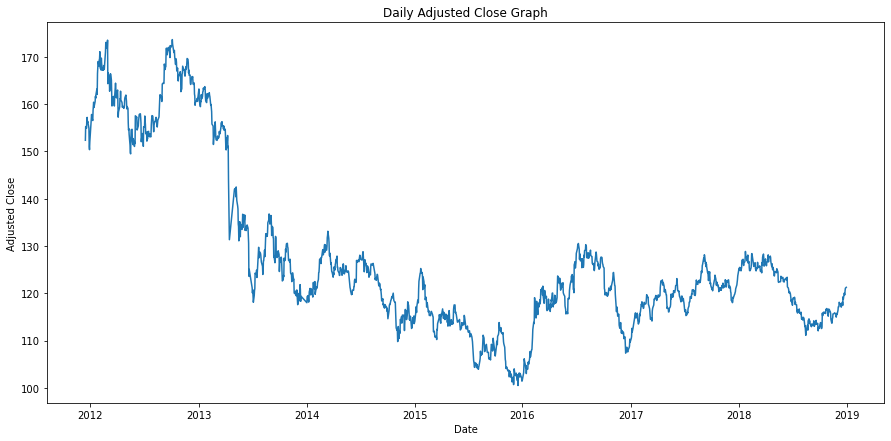

In [49]:
#Plottiong the target column which is (adj_close)
plt.figure(figsize=(15,7))
sns.lineplot(x='Date',y='Adj Close',data=df)
plt.xlabel('Date');
plt.ylabel('Adjusted Close');
plt.title('Daily Adjusted Close Graph');

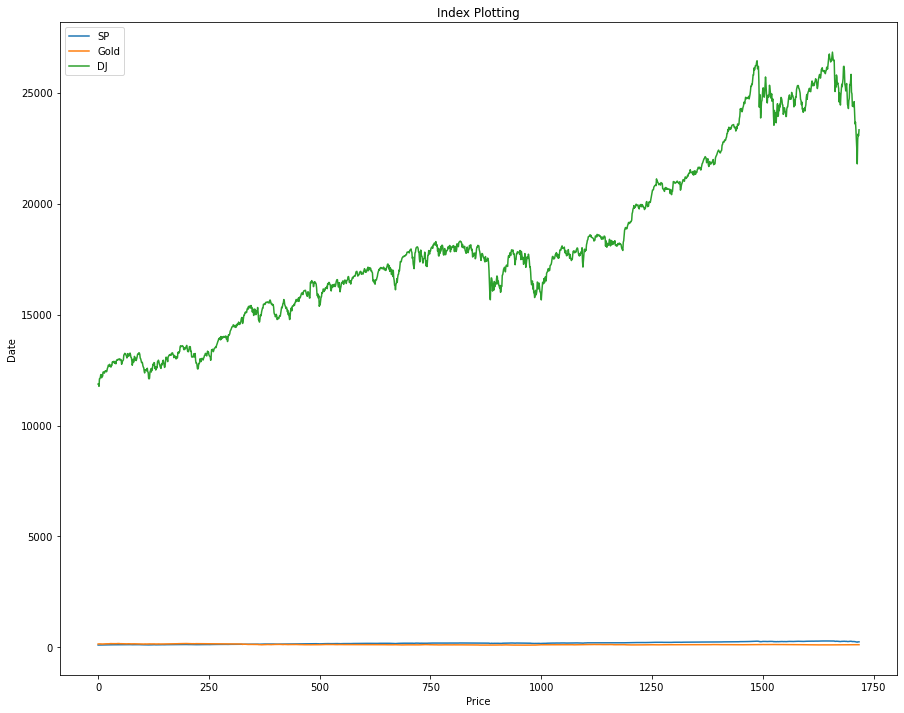

In [50]:
#The dataset has SP and DJ(Dow Jones) Index
#Finding relation between SP and DJ and gold index
y1=df['SP_Ajclose']

y2=df['Adj Close']
y3=df['DJ_Ajclose']

data = pd.DataFrame({'SP':y1,'Gold':y2,'DJ':y3})
d=data.plot(title='Index Plotting',figsize=(15,12));
d.set_ylabel('Date');
d.set_xlabel('Price');
plt.show();

<AxesSubplot:>

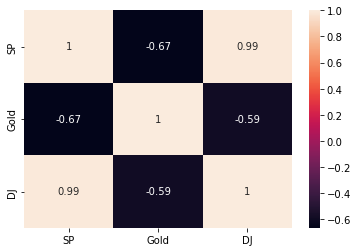

In [53]:
#Finding correlation between the 3 indexes
correlation = data.corr()
corr_array  = np.array(correlation)

sns.heatmap(corr_array,xticklabels=data.columns,yticklabels=data.columns,annot=True)

In [54]:
#There seems to be negative relation of gold with both the indexes,and we also find that DJ and SP are correlated

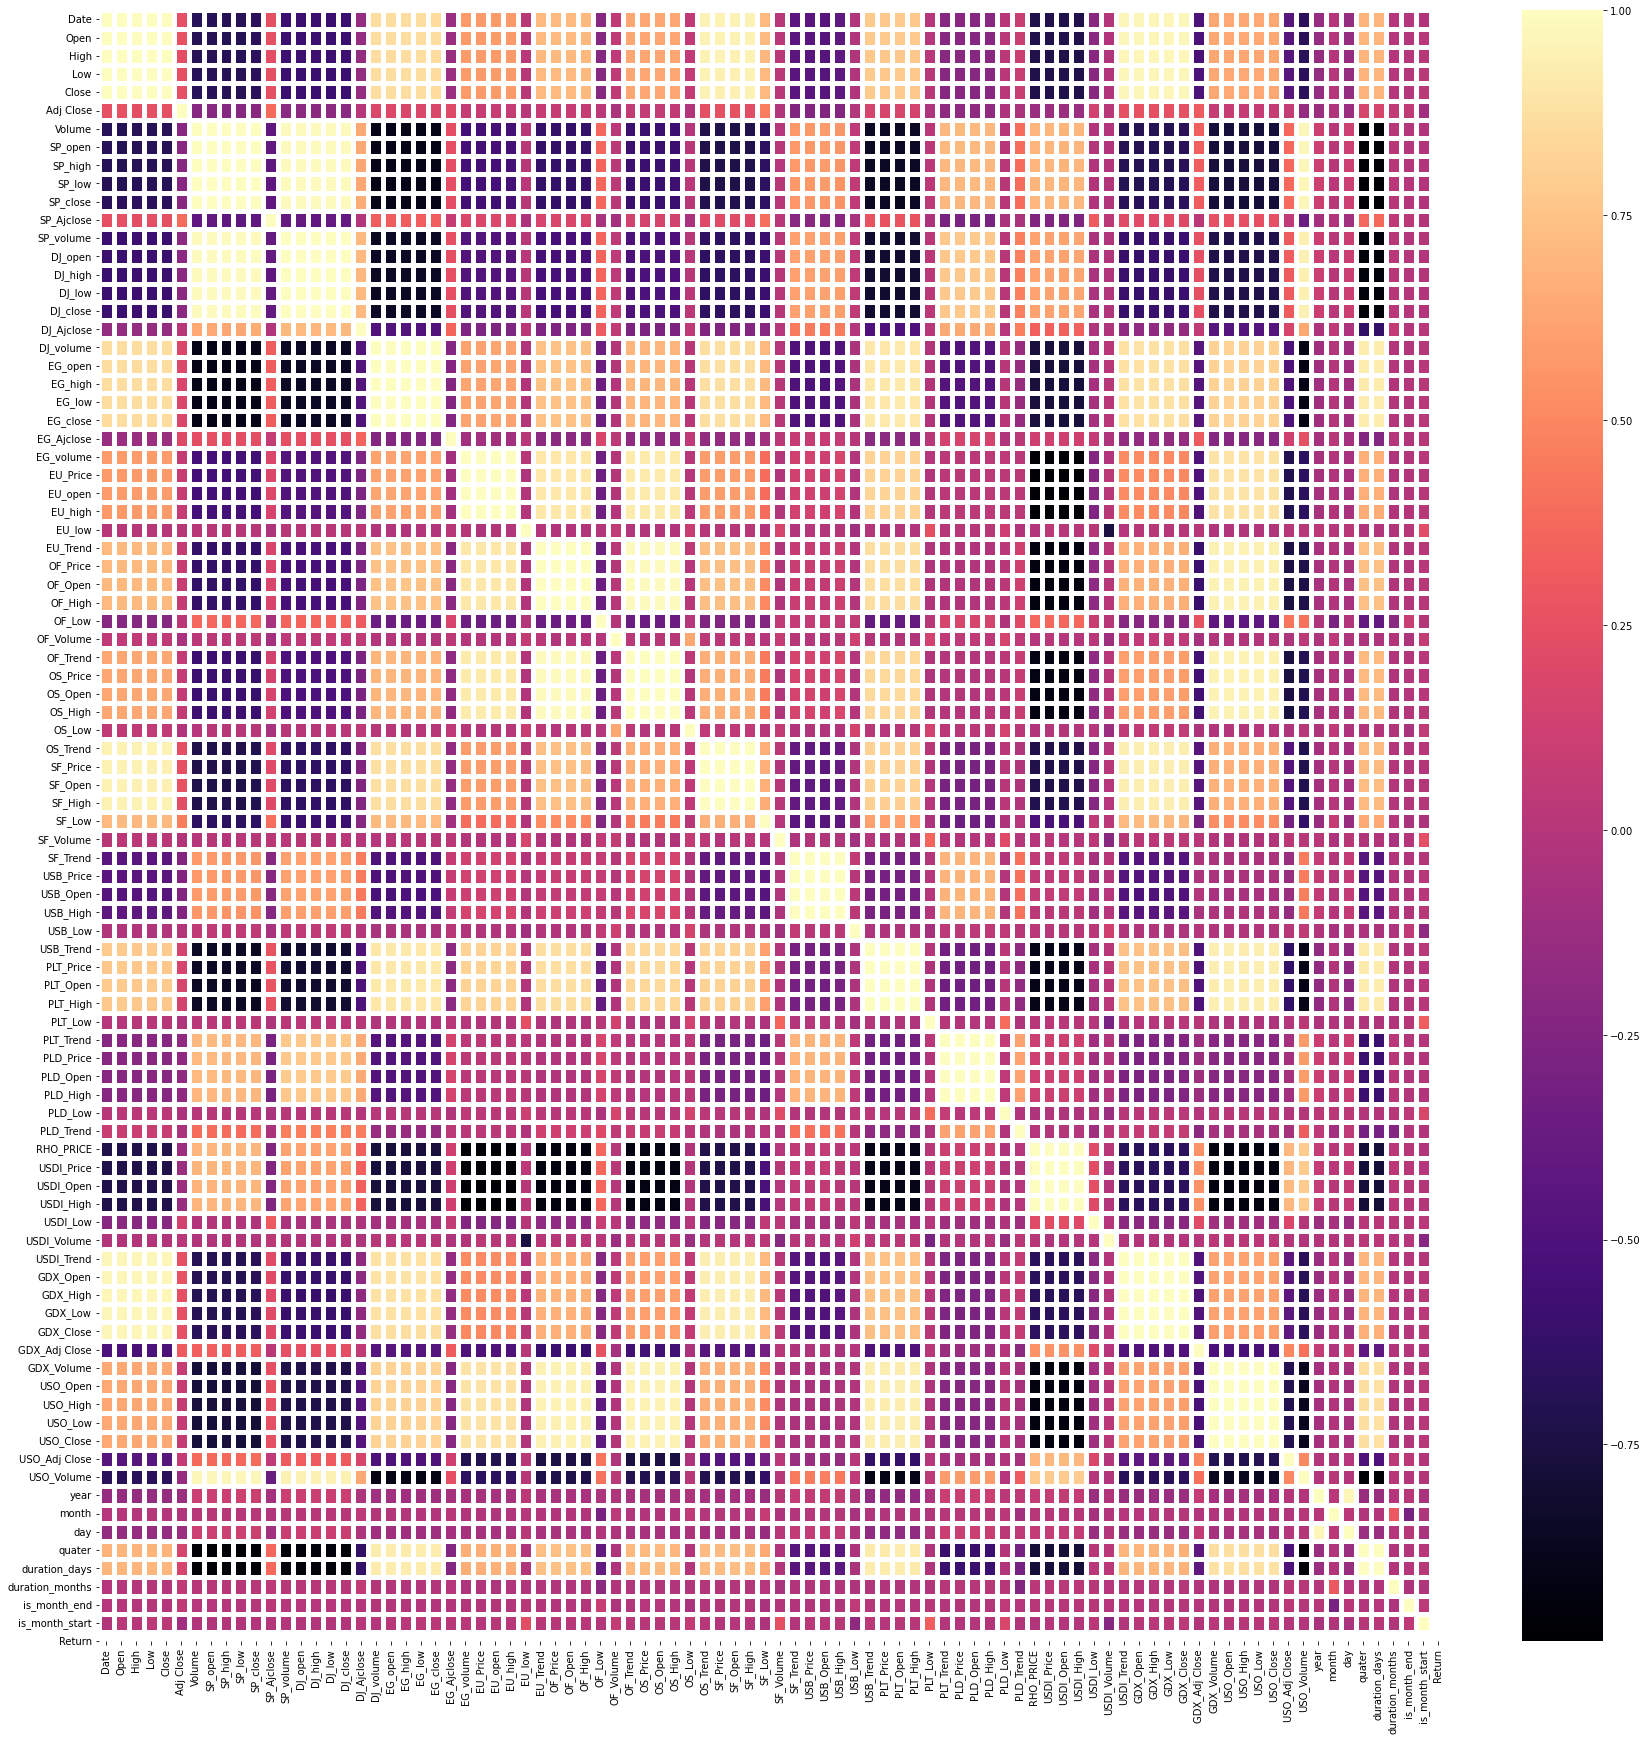

In [104]:
#Finding the correlation between all the columns
correlation = df.corr()
corr_array  = np.array(correlation)
    
plt.figure(figsize=(30, 30))
sns.heatmap(corr_array, xticklabels=df.columns, yticklabels=df.columns, linewidths=5, cmap='magma')
plt.show()

In [63]:
#Finding highest and lowest correlated columns
corr_mat =correlation.corr()
coeff = corr_mat['Adj Close'].sort_values(ascending = False)

In [64]:
#Highly Correlated Values
coeff[coeff>0.5]

Close            1.000000
Adj Close        1.000000
Low              0.999991
High             0.999990
Open             0.999989
GDX_Low          0.999108
GDX_Open         0.999032
GDX_Close        0.999015
GDX_High         0.998953
GDX_Adj Close    0.998925
SF_Low           0.998181
SF_Price         0.998048
SF_Open          0.998014
SF_High          0.997875
EG_low           0.985659
EG_open          0.985548
EG_close         0.985478
EG_high          0.985306
EG_Ajclose       0.985131
SF_Volume        0.982159
PLT_High         0.967082
PLT_Price        0.966961
PLT_Open         0.966782
PLT_Low          0.966636
USO_High         0.929826
USO_Close        0.929609
USO_Adj Close    0.929609
USO_Open         0.929570
USO_Low          0.929172
OF_High          0.925818
OF_Price         0.925359
OF_Open          0.924943
OF_Low           0.924433
OS_High          0.903344
OS_Open          0.902324
OS_Price         0.902312
OS_Low           0.901569
EU_high          0.887717
EU_Price    

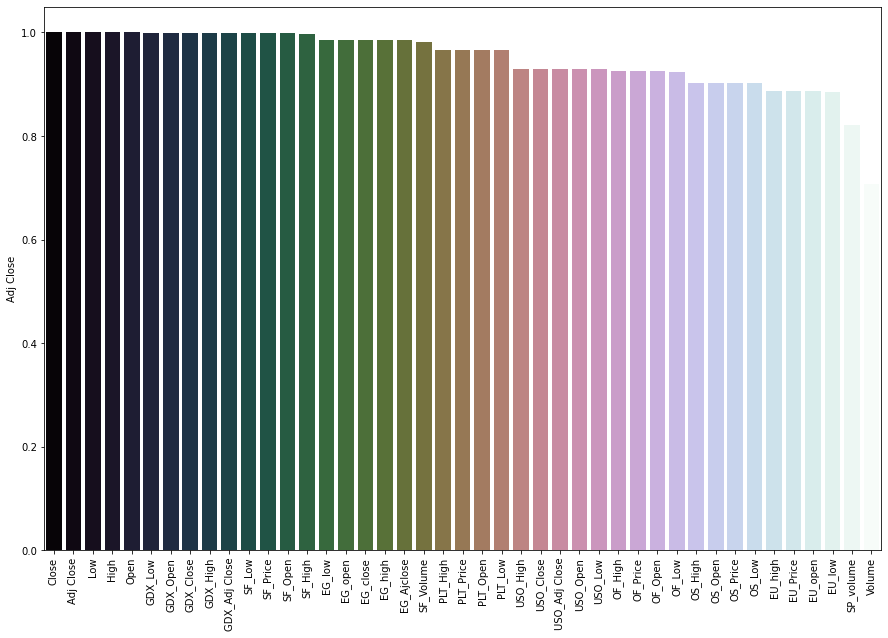

In [101]:
plt.figure(figsize=(15, 10))
sns.barplot(x=a.index, y=a, palette='cubehelix')
plt.xticks(rotation=90)
plt.show()

In [67]:
#Negative Correlated Values
coeff[coeff<-0.5]

RHO_PRICE     -0.526440
USDI_Volume   -0.540394
USB_Low       -0.748493
USB_Open      -0.767194
USB_Price     -0.768888
PLD_Low       -0.779308
PLD_Open      -0.780353
PLD_Price     -0.780869
PLD_High      -0.783879
USB_High      -0.785632
EG_volume     -0.790091
DJ_volume     -0.859087
USO_Volume    -0.869464
OF_Volume     -0.880539
GDX_Volume    -0.906263
USDI_High     -0.937661
USDI_Open     -0.937987
USDI_Price    -0.938306
USDI_Low      -0.938784
DJ_low        -0.945309
DJ_Ajclose    -0.945526
DJ_close      -0.945526
DJ_open       -0.945550
DJ_high       -0.945688
SP_Ajclose    -0.958082
SP_low        -0.960242
SP_close      -0.960420
SP_open       -0.960438
SP_high       -0.960571
Name: Adj Close, dtype: float64

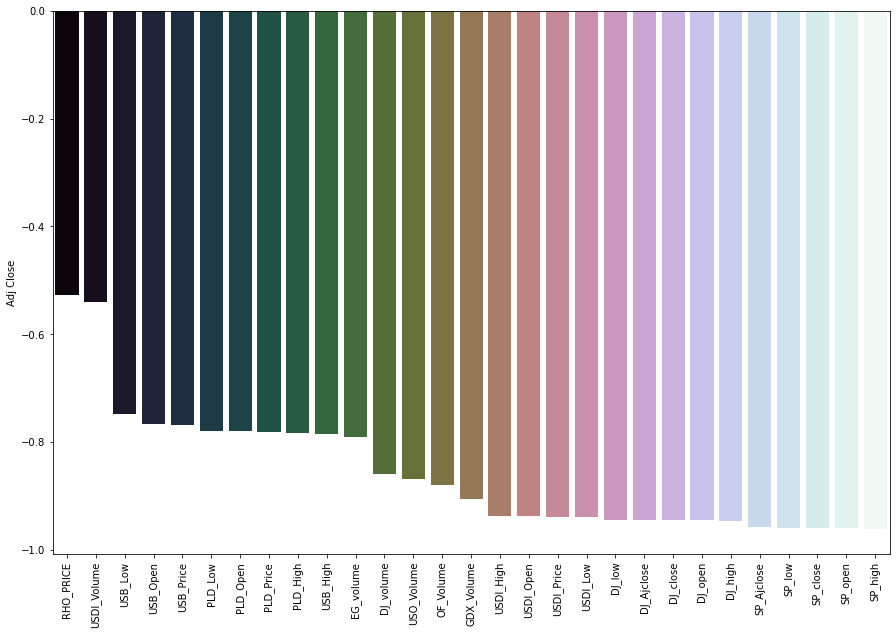

In [102]:

plt.figure(figsize=(15,10));
b=coeff[coeff<-0.5]
sns.barplot(x=b.index,y=b,palette='cubehelix');
plt.xticks(rotation=90);

<h3>Plotting Highly Correlated Columns with respect to Target Column</h3>    

In [82]:
def scatter(i,ax1):
    ax1.scatter(df.index, df[i], s=10, c='grey', marker="s", label=i)
    ax1.scatter(df.index,df['Adj Close'], s=10, c='pink', marker="o", label='Adj Close')
    plt.legend(loc='upper left');
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('{} vs Adj Close graph'.format(i))

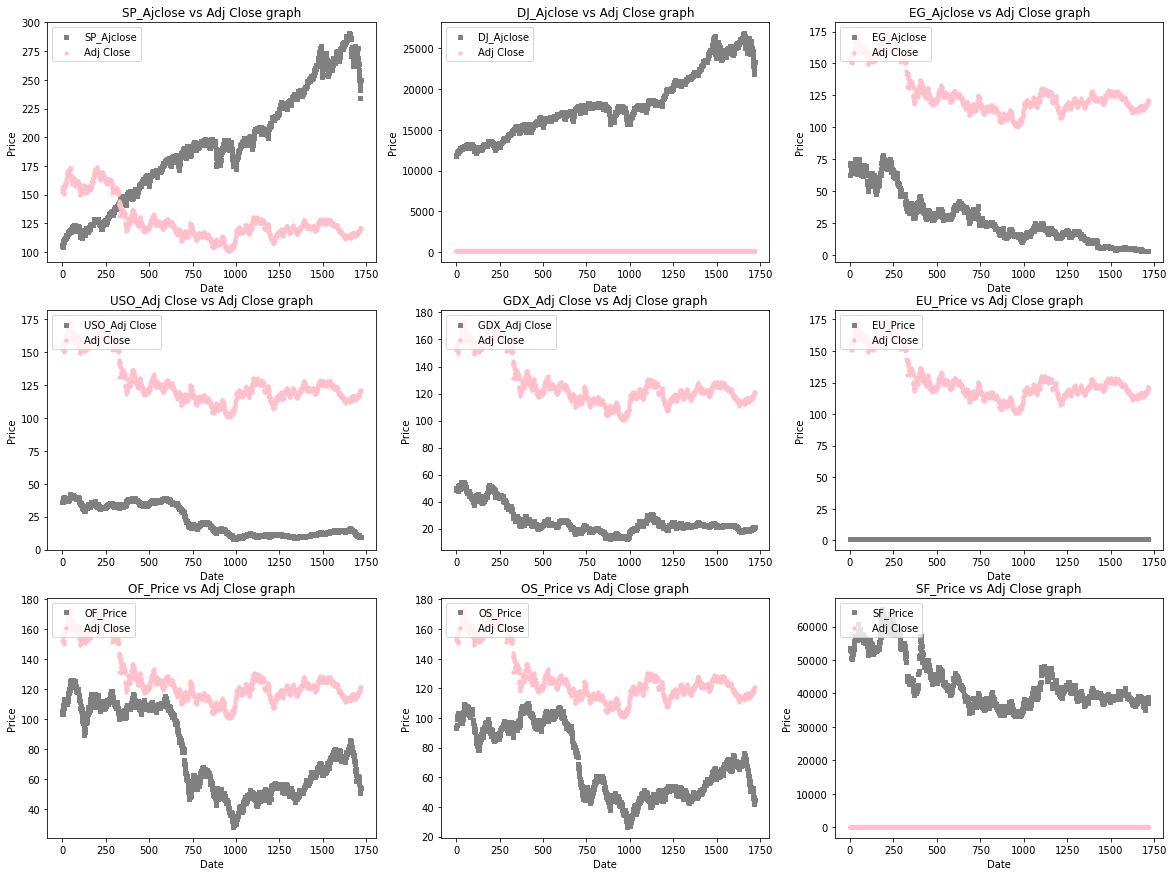

In [85]:
fig=plt.figure(figsize=(20,15))
plt.tight_layout(pad=3.0)
ax1 = fig.add_subplot(331)
scatter('SP_Ajclose',ax1)
ax1 = fig.add_subplot(332)
scatter('DJ_Ajclose',ax1)
ax1 = fig.add_subplot(333)
scatter('EG_Ajclose',ax1)
ax1 = fig.add_subplot(334)
scatter('USO_Adj Close',ax1)
ax1 = fig.add_subplot(335)
scatter('GDX_Adj Close',ax1)
ax1 = fig.add_subplot(336)
scatter('EU_Price',ax1)
ax1 = fig.add_subplot(337)
scatter('OF_Price',ax1)
ax1 = fig.add_subplot(338)
scatter('OS_Price',ax1)
ax1 = fig.add_subplot(339)
scatter('SF_Price',ax1)

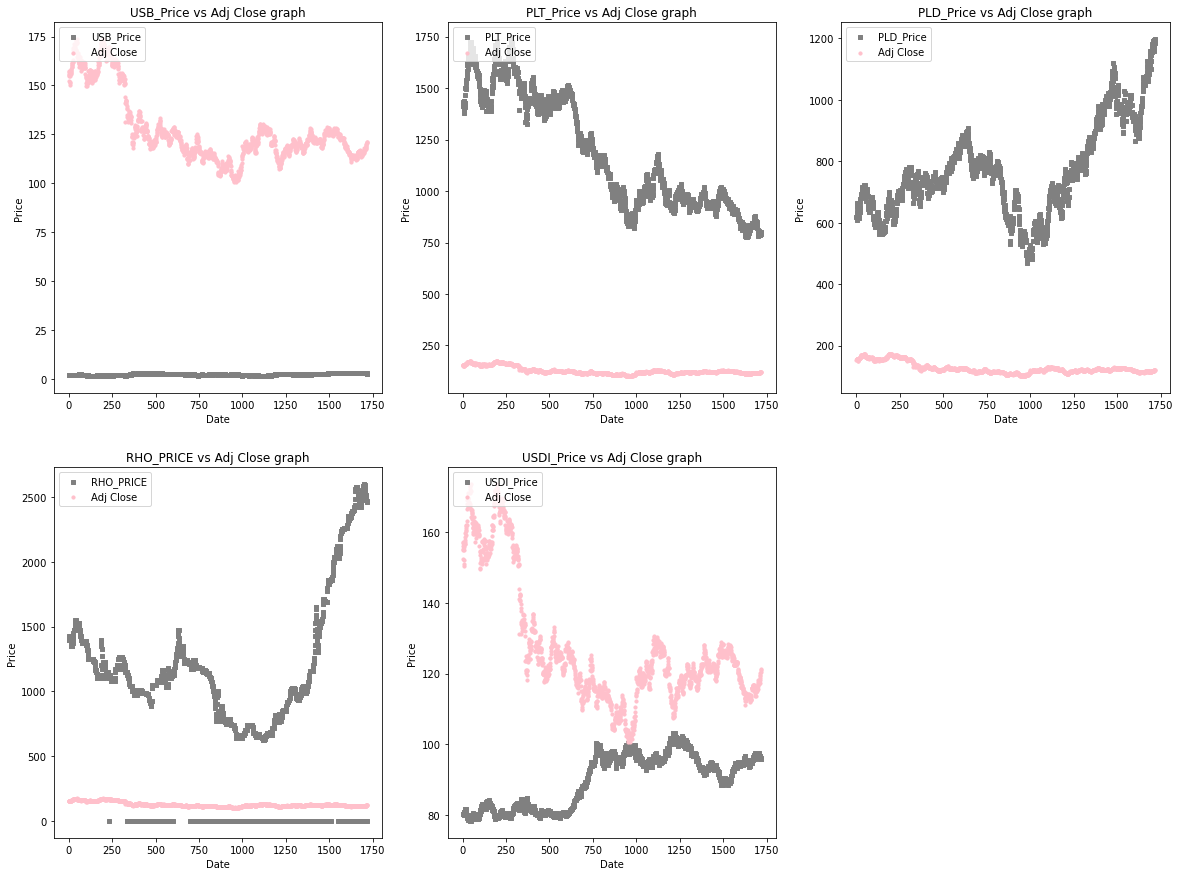

In [86]:
fig=plt.figure(figsize=(20,15))
plt.tight_layout(pad=3.0)
ax1 = fig.add_subplot(231)
scatter('USB_Price',ax1)
ax1 = fig.add_subplot(232)
scatter('PLT_Price',ax1)
ax1 = fig.add_subplot(233)
scatter('PLD_Price',ax1)
ax1 = fig.add_subplot(234)
scatter('RHO_PRICE',ax1)
ax1 = fig.add_subplot(235)
scatter('USDI_Price',ax1)

<h1>3. Feature Engineering</h1>

In [87]:
max(df)

'Volume'

In [88]:
df['Date']

0      2011-12-15
1      2011-12-16
2      2011-12-19
3      2011-12-20
4      2011-12-21
          ...    
1713   2018-12-24
1714   2018-12-26
1715   2018-12-27
1716   2018-12-28
1717   2018-12-31
Name: Date, Length: 1718, dtype: datetime64[ns]

In [91]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['quater'] = df['Date'].dt.quarter



today = pd.to_datetime('2018-1-1')

df['duration_days'] = (today - df['Date']).dt.days
df['duration_months'] = ((today- df.Date)/np.timedelta64(1, 'M'))
df['duration_months'] = df['duration_months'].astype(int)

df['is_month_end'] = df.Date.dt.is_month_end.astype(int)
df['is_month_start']= df.Date.dt.is_month_start.astype(int)
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,year,month,day,quater,duration_days,duration_months,is_month_end,is_month_start
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,2011,12,15,4,2209,72,0,0
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,2011,12,16,4,2208,72,0,0
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,2011,12,19,4,2205,72,0,0
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,2011,12,20,4,2204,72,0,0
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.1500

In [93]:
df['is_month_start'].value_counts()

0    1666
1      52
Name: is_month_start, dtype: int64

In [94]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,year,month,day,quater,duration_days,duration_months,is_month_end,is_month_start
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,2011,12,15,4,2209,72,0,0
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,2011,12,16,4,2208,72,0,0
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,2011,12,19,4,2205,72,0,0
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,2011,12,20,4,2204,72,0,0
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.1500

In [95]:
#Calculating the daily return and plotting it against date
df1 = df
df1['Return'] = ((df['Adj Close'] - df['Open']) / df['Adj Close']) * 100
df1

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,year,month,day,quater,duration_days,duration_months,is_month_end,is_month_start,Return
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,2011,12,15,4,2209,72,0,0,-1.582093
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,2011,12,16,4,2208,72,0,0,0.592668
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,2011,12,19,4,2205,72,0,0,-0.393879
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,2011,12,20,4,2204,72,0,0,0.101917
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,140

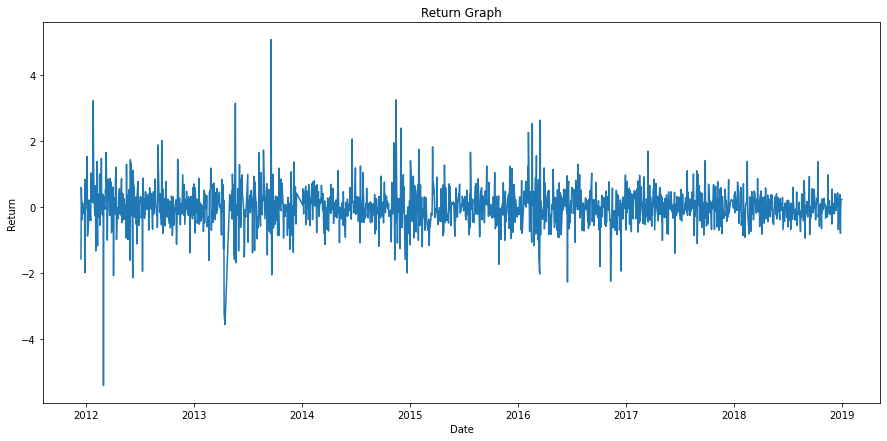

In [100]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Date', y='Return', data=df1)
plt.xlabel('Date');
plt.ylabel('Return');
plt.title('Return Graph');

In [105]:
max_return_yearly = df1.groupby(['year'])['Return'].max()
max_return_yearly

year
2011    0.831449
2012    3.214752
2013    5.067794
2014    3.241023
2015    1.815432
2016    2.628740
2017    1.686021
2018    1.372530
Name: Return, dtype: float64

<h6>The graph displays the maximum return of each year.</h6>

plt.figure(figsize=(15,7))
sns.lineplot(x = max_return_yearly.index, y = max_return_yearly, marker='s')
plt.xlabel('Date');
plt.ylabel('Return');
plt.title('Maximum Return Graph');


<h8>From that graph we can conclude that year 2013 recorded the highest return which was 5.067794.</h8>

In [111]:
avg_return_yearly = df1.groupby(['year'])['Return'].mean()
avg_return_yearly

year
2011   -0.251609
2012    0.034822
2013   -0.027159
2014   -0.003641
2015   -0.012277
2016   -0.036758
2017    0.036814
2018   -0.022735
Name: Return, dtype: float64

<h6>The graph displays the average return of each year</h6>

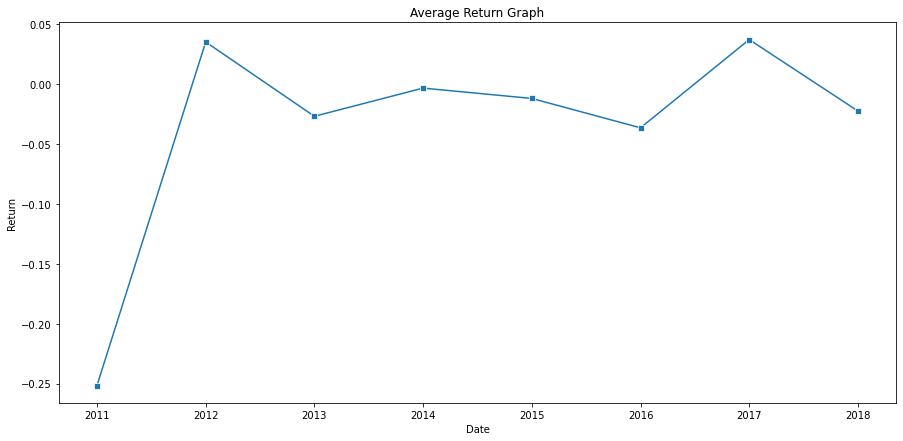

In [112]:
plt.figure(figsize=(15,7))
sns.lineplot(x = avg_return_yearly.index, y = avg_return_yearly, marker='s')
plt.xlabel('Date');
plt.ylabel('Return');
plt.title('Average Return Graph');

<h8>From that graph we can conclude that year 2017 recorded the highest average return which was 0.036814.</h8>

In [118]:
df2 = df1.groupby(['year', 'month', 'day']).first()

<h6>Comparing all the available adjusted close</h6>

In [119]:
Required_variables = ['year','Adj Close', 'GDX_Adj Close', 'EG_Ajclose', 'USO_Adj Close', 'SP_Ajclose']
df3 = df1[Required_variables]
df3

,year,Adj Close,GDX_Adj Close,EG_Ajclose,USO_Adj Close,SP_Ajclose
0,2011,152.330002,48.973877,70.431755,36.130001,105.441238
1,2011,155.229996,49.921513,72.364037,36.270000,105.597549
2,2011,154.869995,48.490578,62.509384,36.200001,104.468536
3,2011,156.979996,50.215282,64.731514,37.560001,107.629784
4,2011,157.160004,50.186852,66.180725,38.110001,107.838242
...,...,...,...,...,...,...
1713,2018,120.019997,21.090000,2.950000,9.290000,234.339996
1714,2018,119.660004,20.620001,3.000000,9.900000,246.179993
1715,2018,120.570000,20.969999,2.950000,9.620000,248.070007
1716,2018,121.059998,20.600000,2.900000,9.530000,247.750000


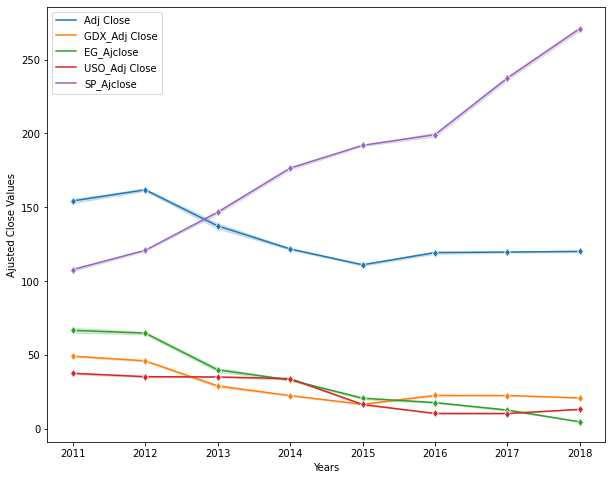

In [123]:
plt.figure(figsize=(10,8))
sns.lineplot(x='year', y='value', hue='variable', data=pd.melt(df3, ['year']), marker='d')
plt.ylabel('Ajusted Close Values')
plt.xlabel('Years')
plt.legend()

<h8>I fond that the SP is the best performing index in the long duration and Gold is the second best performing index.</h8>

<h10>- Univariate Selection</h10>

In [128]:
X=df.drop(['Adj Close','Date'],axis=1)
y=df['Adj Close']

In [130]:
X=X.astype(int)
y=y.astype(int)

In [132]:
best_f=SelectKBest(score_func=f_classif,k=4)
fit=best_f.fit(X,y)

df_score=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)
features_score=pd.concat([df_col,df_score],axis=1)
features_score.columns=['Features','Scores']
features_score   

,Features,Scores
0,Open,1.015053e+04
1,High,1.830504e+04
2,Low,1.760652e+04
3,Close,inf
4,Volume,6.203306e+00
...,...,...
83,duration_days,3.272173e+01
84,duration_months,3.336853e+01
85,is_month_end,9.503224e-01
86,is_month_start,8.287070e-01


In [133]:
features_score.sort_values(by='Scores',ascending=False)


,Features,Scores
3,Close,inf
1,High,1.830504e+04
2,Low,1.760652e+04
0,Open,1.015053e+04
70,GDX_Close,5.895322e+02
...,...,...
86,is_month_start,8.287070e-01
23,EU_Price,NaN
24,EU_open,NaN
25,EU_high,NaN


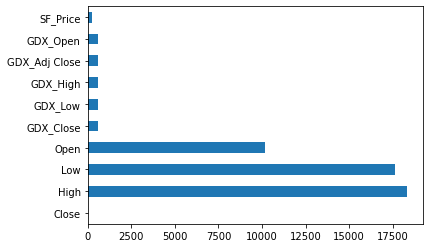

In [138]:
feat_imp=pd.Series(best_f.scores_,index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

In [140]:
def scatter(i,ax1):
    ax1.scatter(df.index, df[i], s=10, c='grey', marker="s", label=i)
    ax1.scatter(df.index,df['Adj Close'], s=10, c='pink', marker="s", label='Adj Close')
    plt.legend(loc='upper left');
    plt.xlabel('year')
    plt.ylabel('Price')
    plt.title('{} vs Adj Close graph'.format(i))

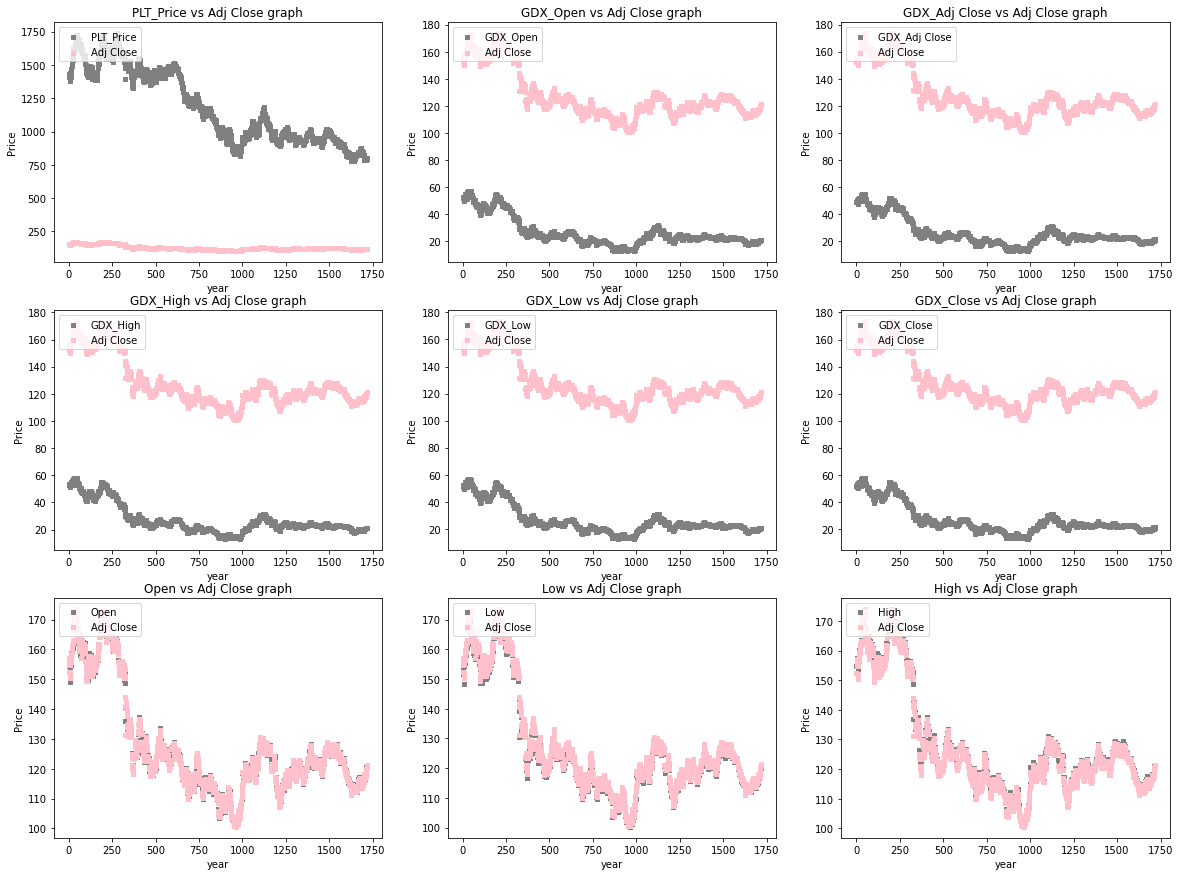

In [141]:
fig=plt.figure(figsize=(20,15))
plt.tight_layout(pad=3.0)
ax1 = fig.add_subplot(331)
scatter('PLT_Price',ax1)
ax1 = fig.add_subplot(332)
scatter('GDX_Open',ax1)
ax1 = fig.add_subplot(333)
scatter('GDX_Adj Close',ax1)
ax1 = fig.add_subplot(334)
scatter('GDX_High',ax1)
ax1 = fig.add_subplot(335)
scatter('GDX_Low',ax1)
ax1 = fig.add_subplot(336)
scatter('GDX_Close',ax1)
ax1 = fig.add_subplot(337)
scatter('Open',ax1)
ax1 = fig.add_subplot(338)
scatter('Low',ax1)
ax1 = fig.add_subplot(339)
scatter('High',ax1)

<h10>In the above plot we can see that High,Close is more related to the dependent(y) features</h10>



<h10> - ExtraTreesClassifier</h10>

In [143]:
tree=ExtraTreesClassifier(n_estimators=10)
tree.fit(X,y)

ExtraTreesClassifier(n_estimators=10)

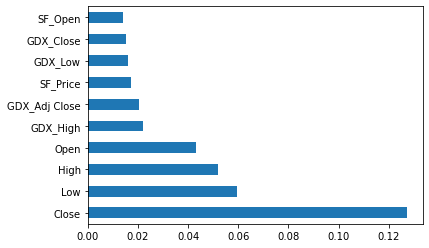

In [144]:
feat_imp=pd.Series(tree.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

In [153]:
def scat(i,ax1):
    ax1.scatter(df.index, df[i], s=10, c='lightblue', marker="o", label=i)
    ax1.scatter(df.index,df['Adj Close'], s=10, c='lightseagreen', marker="s", label='Adj Close')
    plt.legend(loc='upper left');
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('{} vs Adj Close graph'.format(i))

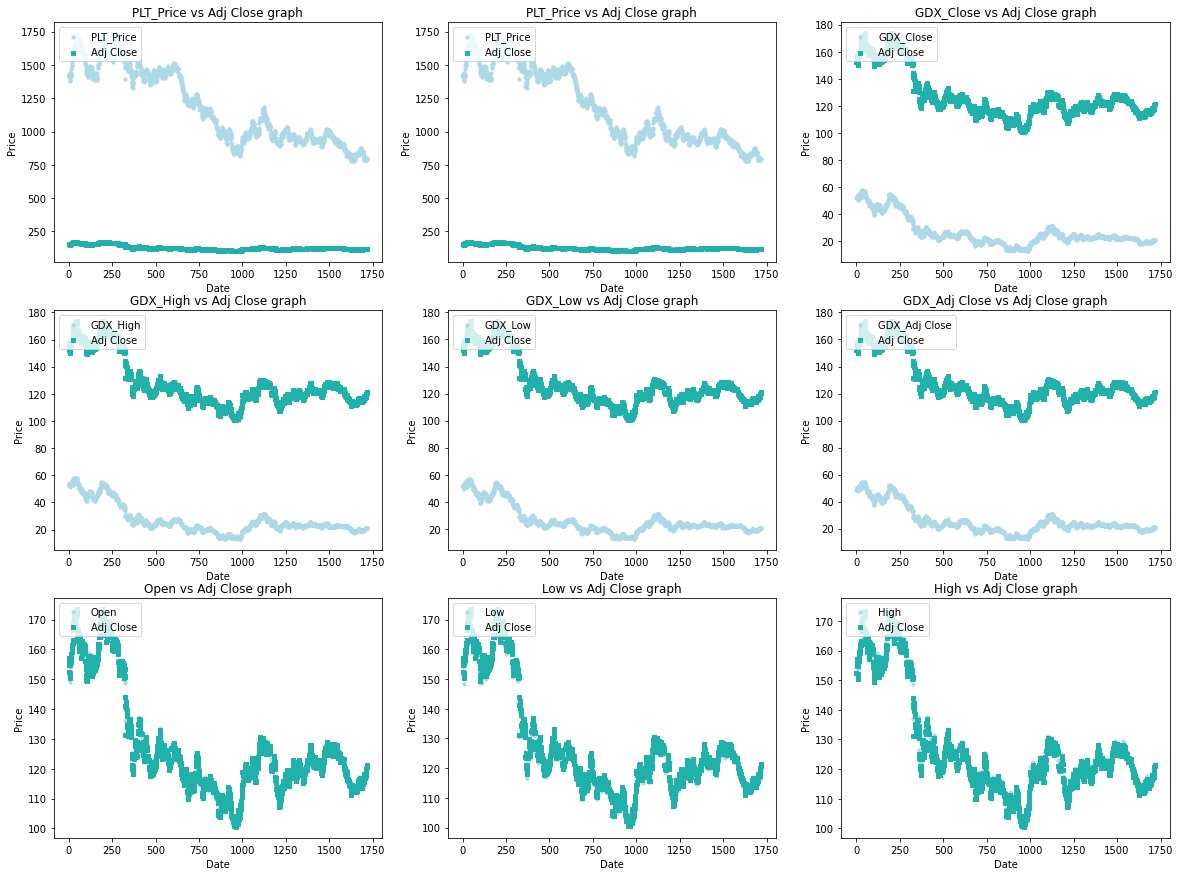

In [154]:
fig=plt.figure(figsize=(20,15))
plt.tight_layout(pad=3.0)
ax1 = fig.add_subplot(331)
scat('PLT_Price',ax1)
ax1 = fig.add_subplot(332)
scat('PLT_Price',ax1)
ax1 = fig.add_subplot(333)
scat('GDX_Close',ax1)
ax1 = fig.add_subplot(334)
scat('GDX_High',ax1)
ax1 = fig.add_subplot(335)
scat('GDX_Low',ax1)
ax1 = fig.add_subplot(336)
scat('GDX_Adj Close',ax1)
ax1 = fig.add_subplot(337)
scat('Open',ax1)
ax1 = fig.add_subplot(338)
scat('Low',ax1)
ax1 = fig.add_subplot(339)
scat('High',ax1)

<h10>In the above plot we can see that High,Close is more related to the dependent(y) features</h10>



In [155]:
print(tree.feature_importances_)


[0.04317137 0.05203704 0.05961392 0.12715059 0.00812427 0.00917822
 0.0098718  0.01016867 0.00802092 0.00926913 0.00793932 0.00905218
 0.01037748 0.0083185  0.00947076 0.00915437 0.0088137  0.00960171
 0.00631262 0.00953998 0.01414478 0.0109135  0.00980058 0.
 0.         0.         0.         0.00926818 0.00895596 0.00862624
 0.00852335 0.0098676  0.00743304 0.00714715 0.0092933  0.00976229
 0.00917725 0.0093692  0.00634012 0.01723337 0.01418964 0.01396224
 0.0131508  0.00769636 0.0085208  0.00495946 0.00142036 0.00259185
 0.00218195 0.00673964 0.01213007 0.00960006 0.01098218 0.01188549
 0.00761289 0.00791379 0.00788751 0.00927136 0.0083746  0.00711245
 0.00775111 0.00998638 0.01122826 0.0083353  0.00937941 0.00726281
 0.00522409 0.01408563 0.02218949 0.0158982  0.01529547 0.02032247
 0.00972757 0.00585243 0.00833822 0.00833601 0.00595965 0.00616023
 0.00755168 0.00459516 0.00850433 0.01081645 0.0064828  0.00844352
 0.00776788 0.00151475 0.00067635 0.00308841]


<h3>Standardization</h3>

In [156]:
df.drop(['Date'],axis=1,inplace=True)


<h10>1.PreProcessing Scaler</h10>


In [159]:
sc=preprocessing.StandardScaler()
dfs=sc.fit_transform(df)

In [160]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,year,month,day,quater,duration_days,duration_months,is_month_end,is_month_start,Return
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,192.204570,1.098026e+08,18161.094398,18244.137842,18073.889095,18164.119043,18164.119043,1.779131e+08,28.276554,28.822555,27.653655,28.209302,27.783958,1.136074e+06,1.208494,1.208531,1.213360,1.203692,0.494761,77.504523,77.521740,78.384936,76.593894,225958.585565,0.498836,70.153097,70.275396,71.120256,69.330990,0.503492,43284.478463,43308.692084,43671.194412,42911.912107,26912.462165,0.480792,2.262769,2.263091,2.286512,2.238765,0.490105,1183.915425,1184.388853,1194.274622,1173.409692,0.484284,766.805122,766.363481,773.529302,759.444208,0.530850,1130.442375,89.809427,89.805442,90.098981,89.509331,27568.300349,0.512806,26.747427,27.071304,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07,2015.010477,6.548312,15.655995,2.511641,909.188009,29.511059,0.030268,0.030268,-0.005750
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,48.514161,4.925110e+07,3889.752079,3906.008604,3867.959072,3884.495887,3884.495887,1.212753e+08,20.325861,20.620624,19.972314,20.294635,19.721857,7.301289e+05,0.100535,0.100579,0.100184,0.100695,0.500118,27.400703,27.366113,27.393294,27.322868,88844.540581,0.500144,23.471514,23.480047,23.494737,23.422198,0.500133,7530.704012,7550.423242,7614.302267,7443.076538,21880.969122,0.499776,0.433469,0.433977,0.437574,0.429960,0.500048,273.842095,273.978168,275.427791,271.799909,0.499898,148.307189,148.078365,149.010291,147.381087,0.499193,570.012881,7.516115,7.520788,7.567895,7.459269,14643.314699,0.499982,10.620552,10.706388,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07,2.017658,3.425341,8.700066,1.114647,743.085152,24.199945,0.171373,0.171373,0.596115
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,104.468536,2.785650e+07,11769.209960,11925.879880,11735.190430,11766.259770,11766.259770,8.410000e+06,2.770000,2.850000,2.730

<h10>2.MinMax Scaler</h10>

In [162]:
mm=preprocessing.MinMaxScaler()
dfm=mm.fit_transform(df)
dfm = pd.DataFrame(dfm,columns=df.columns)
dfm

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,year,month,day,quater,duration_days,duration_months,is_month_end,is_month_start,Return
0,0.744604,0.738369,0.708213,0.708932,0.708932,0.216899,0.005672,0.005128,0.011410,0.010907,0.005227,0.357232,0.003723,0.002793,0.005980,0.006808,0.006808,0.144065,0.927031,0.937940,0.923507,0.910390,0.899367,0.062991,0.741754,0.731583,0.736430,0.732978,1.0,0.785133,0.783233,0.780231,0.794484,0.005052,1.0,0.798448,0.814096,0.807724,0.809329,0.0,0.636137,0.654244,0.643157,0.624960,0.586185,1.0,0.293993,0.291288,0.278075,0.308901,1.0,0.664293,0.673522,0.665882,0.645945,0.0,0.204113,0.211690,0.192849,0.215172,1.0,0.548077,0.081679,0.093315,0.079047,0.080869,0.159639,0.0,0.899375,0.893381,0.882804,0.871333,0.866741,0.069810,0.860865,0.843595,0.843889,0.827313,0.827313,0.106029,0.0,1.0,0.466667,1.0,1.000000,1.0,0.0,0.0,0.365774
1,0.738655,0.744116,0.738341,0.748598,0.748598,0.180089,0.000994,0.003671,0.007393,0.007502,0.006067,0.401814,0.006707,0.002815,0.005588,0.006648,0.006648,0.427205,0.914762,0.924504,0.939470,0.936364,0.925062,0.073974,0.746546,0.742309,0.746503,0.744186,1.0,0.767439,0.769278,0.760763,0.769765,0.231123,0.0,0.802866,0.796265,0.793551,0.799687,1.0,0.631592,0.635704,0.636378,0.643179,0.320831,0.0,0.262095,0.259220,0.245989,0.277487,0.0,0.670114,0.667815,0.674665,0.670759,1.0,0.210715,0.222403,0.204337,0.225793,1.0,0.538462,0.077997,0.077795,0.069712,0.073024,0.091692,0.0,0.887996,0.894269,0.893396,0.893556,0.889119,0.050814,0.839550,0.830756,0.834374,0.831424,0.831424,0.105682,0.0,1.0,0.500000,1.0,0.999611,1.0,0.0,0.0,0.573190
2,0.754842,0.750821,0.744669,0.743674,0.743674,0.119667,0.000000,0.000000,0.000000,0.000000,0.000000,0.325512,0.006461,0.000000,0.000000,0.000000,0.000000,0.142092,0.856645,0.856686,0.817746,0.803896,0.794015,0.195237,0.735269,0.748800,0.734471,0.739703,0.0,0.770388,0.770500,0.760863,0.768846,0.245146,1.0,0.806448,0.800361,0.789182,0.799928,1.0,0.616120,0.627953,0.616786,0.632197,0.330109,0.0,0.240298,0.237306,0.224064,0.256021,0.0,0.660603,0.675938,0.670326,0.674817,0.0,0.190290,0.227014,0.213242,0.206897,0.0,0.538462,0.076317,0.082770,0.072691,0.080668,0.006374,0.0,0.887773,0.880275,0.870633,0.860000,0.855329,0.045691,0.845767,0.829297,0.840321,0.829369,0.829369,0.058437,0.0,1.0,0.600000,1.0,0.998445,1.0,0.0,0.0,0.479099
3,0.773381,0.772304,0.775210,0.772534,0.772534,0.082714,0.000702,0.010605,0.001979,0.021005,0.016988,0.412112,0.000000,0.012728,0.002235,0.022395,0.022395,0.175731,0.822420,0.834933,0.841692,0.833766,0.823565,0.071822,0.758951,0.737511,0.759373,0.743345,1.0,0.801810,0.777325,0.787958,0.784576,0.285344,1.0,0.823881,0.831928,0.851423,0.846209,1.0,0.632495,0.609196,0.622228,0.633816,0.270460,1.0,0.302499,0.299840,0.286631,0.317277,1.0,0.685187,0.661851,0.679684,0.678510,1.0,0.214841,0.222200,0.202977,0.226000,1.0,0.538462,0.078958,0.106248,0.091360,0.077047,0.160339,1.0,0.885319,0.895824,0.900834,0.900444,0.896056,0.030410,0.872706,0.863146,0.878680,0.869310,0.869310,0.082454,0.0,1.0,0.633333,1.0,0.998057,1.0,0.0,0.0,0.526385
4,0.775595,0.773673,0.769019,0.774997,0.774997,0.113697,0.010934,0.011887,0.015834,0.022390,0.018108,0.347056,0.022196,0.012899,0.017554,0.022671,0.022671,0.173568,0.830815,0.851568,0.853665,0.853247,0.842836,0.068013,0.749366,0.758961,0.777280,0.751751,0.0,0.811775,

In [164]:
dfm.describe()


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,year,month,day,quater,duration_days,duration_months,is_month_end,is_month_start,Return
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,0.365294,0.367600,0.365218,0.366837,0.366837,0.075239,0.481962,0.483933,0.485837,0.485898,0.471467,0.170939,0.424308,0.420490,0.421067,0.424765,0.424765,0.190005,0.329414,0.332342,0.331564,0.329991,0.332237,0.098171,0.478699,0.478494,0.479742,0.475180,0.494761,0.504622,0.504551,0.498093,0.505556,0.385515,0.498836,0.520634,0.517294,0.513880,0.520079,0.503492,0.314877,0.315083,0.314246,0.326475,0.131928,0.480792,0.481005,0.479472,0.478883,0.480505,0.490105,0.424444,0.430940,0.426364,0.434282,0.484284,0.407613,0.417363,0.408374,0.414958,0.530850,0.434786,0.460598,0.461020,0.455173,0.458231,0.192689,0.512806,0.313419,0.314334,0.315181,0.316556,0.322452,0.170765,0.423133,0.416608,0.423273,0.415538,0.415538,0.166510,0.572925,0.504392,0.488533,0.503880,0.494826,0.488085,0.030268,0.030268,0.516116
std,0.242487,0.241259,0.239325,0.239861,0.239861,0.053311,0.256282,0.256233,0.253923,0.252623,0.260700,0.102737,0.258211,0.259951,0.256941,0.257898,0.257898,0.135944,0.262506,0.263860,0.265695,0.263567,0.262261,0.073775,0.283436,0.283880,0.280313,0.282139,0.500118,0.278632,0.278762,0.274895,0.279090,0.159723,0.500144,0.280257,0.282892,0.277486,0.282297,0.500133,0.234441,0.234093,0.236785,0.236243,0.107423,0.499776,0.230446,0.231949,0.233997,0.225110,0.500048,0.284659,0.281726,0.287984,0.282786,0.499898,0.203985,0.200811,0.202583,0.203284,0.499193,0.219236,0.300789,0.299275,0.300612,0.300111,0.102573,0.499982,0.236960,0.237814,0.236441,0.235625,0.233463,0.127917,0.338397,0.334948,0.338210,0.335765,0.335765,0.144258,0.288237,0.311395,0.290002,0.371549,0.288801,0.291566,0.171373,0.171373,0.056854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

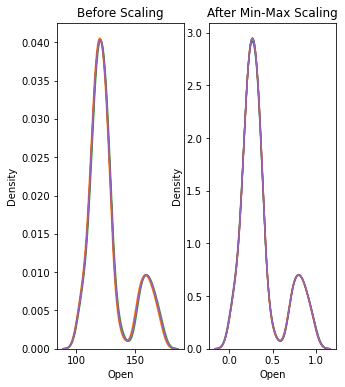

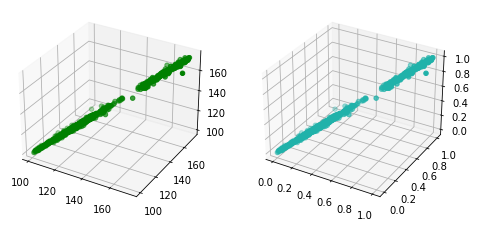

In [167]:
fig, (ob1, ob2) = plt.subplots(ncols=2,figsize=(5,6))
ob1.set_title('Before Scaling')
sns.kdeplot(df['Open'],ax=ob1)
sns.kdeplot(df['Low'],ax=ob1)
sns.kdeplot(df['High'],ax=ob1)
sns.kdeplot(df['Close'],ax=ob1)
sns.kdeplot(df['Adj Close'],ax=ob1)

ob2.set_title('After Min-Max Scaling')
sns.kdeplot(dfm['Open'],ax=ob2)
sns.kdeplot(dfm['Low'],ax=ob2)
sns.kdeplot(dfm['High'],ax=ob2)
sns.kdeplot(dfm['Close'],ax=ob2)
sns.kdeplot(dfm['Adj Close'],ax=ob2)
plt.show()

fig = plt.figure(figsize=(8,6))
ob3 = fig.add_subplot(121,projection='3d')
ob4 = fig.add_subplot(122,projection='3d')
ob3.scatter(df['Open'],df['Close'],df['Adj Close'],color='green')
ob4.scatter(dfm['Open'],dfm['Close'],dfm['Adj Close'],color='lightseagreen')
plt.show()

In [169]:
#Normalization
nm=preprocessing.Normalizer()
dfn=nm.fit_transform(df)
dfn

array([[ 6.34682066e-07,  6.35543370e-07,  6.22254217e-07, ...,
         0.00000000e+00,  0.00000000e+00, -6.48911926e-09],
       [ 3.44110661e-07,  3.46474450e-07,  3.43196354e-07, ...,
         0.00000000e+00,  0.00000000e+00,  1.32164647e-09],
       [ 6.78332900e-07,  6.79990797e-07,  6.73446551e-07, ...,
         0.00000000e+00,  0.00000000e+00, -1.71842912e-09],
       ...,
       [ 2.66077167e-07,  2.66805424e-07,  2.65128229e-07, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.23162860e-07,  3.23911910e-07,  3.22948839e-07, ...,
         0.00000000e+00,  0.00000000e+00,  5.74538096e-10],
       [ 3.68084890e-07,  3.68936794e-07,  3.67628508e-07, ...,
         3.04252671e-09,  0.00000000e+00,  6.77503574e-10]])

<h3>Training and testing data</h3>

In [170]:
X=df.drop(['Adj Close','year', 'month', 'day', 'quater', 'duration_days', 'duration_months',
       'is_month_end', 'is_month_start','Return'],axis=1)
y=df['Adj Close']

min(df['Adj Close'])

100.5

<h3>Encoding training data</h3>

In [171]:
X.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SP_open', 'SP_high',
       'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open', 'DJ_high',
       'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open', 'EG_high',
       'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price', 'EU_open',
       'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open', 'OF_High',
       'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open', 'OS_High',
       'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low',
       'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High', 'USB_Low',
       'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_C

In [172]:
X=X[['Close','High','Low','Open','SF_Price','GDX_Adj Close','GDX_Close','GDX_High']]

In [174]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

<h1>4. Modeling</h1>

* Random Forest
* Decision Tree
* Elastic Net
* XGboost

<h5>Random Forest</h5>

In [178]:
model=RandomForestRegressor(n_estimators=100, verbose=2)

model.fit(X_train.values,y_train.values)
pickle.dump(model, open('random_forest.sav','wb'))
pickle.dump(model, open('RF.pkl', 'wb'))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [180]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores

array([-0.0753733 , -0.0639386 , -0.07965631, -0.07888409, -0.07119693,
       -0.05090537, -0.08069995, -0.06552538, -0.05075456, -0.08023017,
       -0.05742366, -0.05059326, -0.06262254, -0.08721278, -0.07195111,
       -0.07995558, -0.07743442, -0.07737331, -0.06842449, -0.06820237,
       -0.07548319, -0.09791002, -0.05890259, -0.05948202, -0.07602327,
       -0.04531915, -0.08075122, -0.08021701, -0.05466133, -0.06385735])

In [181]:
X_test.columns
    

Index(['Close', 'High', 'Low', 'Open', 'SF_Price', 'GDX_Adj Close',
       'GDX_Close', 'GDX_High'],
      dtype='object')

In [182]:
y_pred=model.predict(X_test)


print("MSE:- ",mean_squared_error(y_test,y_pred))
print("MAE:- ",mean_absolute_error(y_test,y_pred))
print('Negative MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("R2:- ",r2_score(y_test,y_pred))

MSE:-  0.021467894700273778
MAE:-  0.062475258536154536
Negative MAE: -0.070 (0.012)
R2:-  0.9999287483366391


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


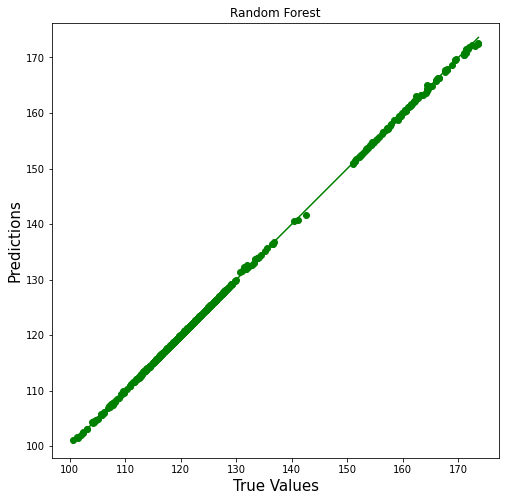

In [186]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c='green')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2],'g-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Random Forest")
plt.axis('equal')
plt.show()

In [188]:
dt_model=tree.DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [189]:
dt_pred=dt_model.predict(X_test)
dt_pred

array([127.699997, 116.519997, 157.210007, 155.139999, 130.559998,
       115.059998, 127.449997, 164.889999, 119.510002, 107.849998,
       102.459999, 104.309998, 153.      , 119.349998, 135.119995,
       116.07    , 121.580002, 115.190002, 127.400002, 105.      ,
       126.059998, 129.860001, 121.849998, 126.      , 119.650002,
       113.019997, 112.580002, 111.540001, 162.119995, 122.120003,
       117.919998, 120.050003, 119.660004, 136.509995, 119.940002,
       108.699997, 114.019997, 124.589996, 131.759995, 161.380005,
       167.559998, 109.209999, 126.309998, 117.059998, 119.339996,
       118.769997, 119.860001, 120.949997, 115.790001, 119.940002,
       129.110001, 171.800003, 117.580002, 162.389999, 120.620003,
       127.839996, 113.07    , 117.580002, 125.      , 121.919998,
       121.190002, 114.459999, 112.580002, 121.209999, 121.129997,
       119.169998, 127.150002, 112.730003, 127.849998, 118.639999,
       124.510002, 125.440002, 165.070007, 121.580002, 160.440

In [190]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(dt_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores

array([-0.09034474, -0.08399942, -0.09904333, -0.11999991, -0.08156503,
       -0.06782574, -0.0958259 , -0.11034791, -0.07886936, -0.1000871 ,
       -0.07637852, -0.06513056, -0.0881735 , -0.07608656, -0.10939176,
       -0.1076519 , -0.10991366, -0.099478  , -0.08904397, -0.06226125,
       -0.09387929, -0.10026097, -0.06826101, -0.0742607 , -0.08217386,
       -0.07460845, -0.08713024, -0.1314785 , -0.08017302, -0.12147744])

In [191]:
print("MSE:- ",mean_squared_error(y_test,dt_pred))
print("MAE:- ",mean_absolute_error(y_test,dt_pred))
print('Negative MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("R2:- ",r2_score(y_test,dt_pred))

MSE:-  0.02310944118150844
MAE:-  0.07410927160493909
Negative MAE: -0.091 (0.017)
R2:-  0.9999233000652131


In [192]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': dt_pred})
result

,Actual,Predicted
599,127.699997,127.699997
1348,116.470001,116.519997
115,157.320007,157.210007
135,155.089996,155.139999
339,131.070007,130.559998
...,...,...
360,132.130005,132.210007
83,159.309998,159.300003
48,173.490005,173.020004
468,120.699997,120.739998


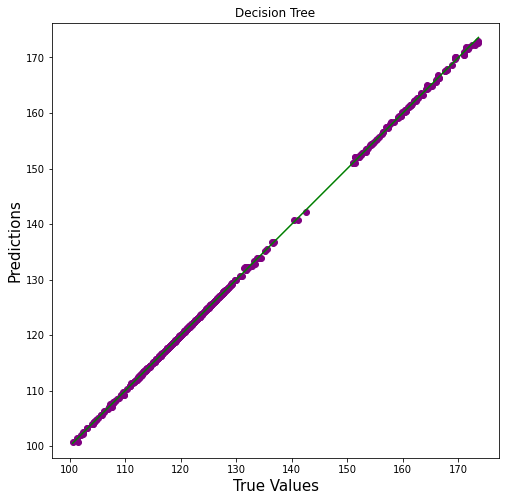

In [193]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, dt_pred, c='purple')

p1 = max(max(dt_pred), max(y_test))
p2 = min(min(dt_pred), min(y_test))
plt.plot([p1, p2], [p1, p2],'g-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Decision Tree")
plt.axis('equal')
plt.show()

<h5>Elastic Net</h5>


In [195]:
a=X_train.values
len(a[0])

8

In [196]:
regr = ElasticNet()
regr.fit(X_train.values, y_train.values)
pickle.dump(regr, open('random_forest.sav','wb'))
pickle.dump(regr, open('Randommodel.pkl', 'wb'))
print(X_test.shape)
print(X_test.columns)

(567, 8)
Index(['Close', 'High', 'Low', 'Open', 'SF_Price', 'GDX_Adj Close',
       'GDX_Close', 'GDX_High'],
      dtype='object')


In [197]:
reg_pred=regr.predict(X_test.values)
reg_pred

array([127.79760505, 116.38812711, 156.95494985, 154.86739715,
       131.75348262, 114.84262312, 127.18570054, 165.12465372,
       119.42872649, 107.88370719, 102.51198633, 104.42436666,
       153.06597867, 119.43115602, 134.9189677 , 116.10296856,
       122.4998437 , 115.37622716, 127.56785526, 105.05087028,
       126.12301339, 129.76530228, 121.90574856, 126.11817733,
       119.48842945, 113.26064279, 112.51323094, 111.82997655,
       161.349277  , 122.331618  , 117.99621463, 120.43245587,
       119.45708003, 136.29679685, 119.84121899, 108.58357408,
       114.09009875, 124.36588342, 131.90834051, 161.61628432,
       167.36437177, 109.35425745, 126.13541572, 116.93910111,
       119.63610173, 118.86381145, 119.60688822, 120.7633048 ,
       115.81018479, 120.21728173, 129.32797572, 171.40254328,
       117.47605324, 162.42377744, 120.66179703, 127.69090595,
       113.13195169, 117.49754078, 125.14639374, 121.47657767,
       121.0445524 , 114.05094552, 112.4362208 , 121.25

In [198]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(regr, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores

array([-0.20047125, -0.17583986, -0.20530373, -0.18065568, -0.22421703,
       -0.18239991, -0.18681645, -0.17655198, -0.17362553, -0.19045395,
       -0.17192841, -0.21396877, -0.18813478, -0.18258855, -0.19787074,
       -0.20914868, -0.22747038, -0.17844285, -0.16874959, -0.16068813,
       -0.1834054 , -0.22167981, -0.20059806, -0.19907203, -0.17441721,
       -0.15650928, -0.18735151, -0.21742208, -0.18994844, -0.16981321])

In [199]:
print("MSE:- ",mean_squared_error(y_test,reg_pred))
print("MAE:- ",mean_absolute_error(y_test,reg_pred))
print('Negative MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("R2:- ",r2_score(y_test,reg_pred))

MSE:-  0.09579020403571303
MAE:-  0.20496841120035184
Negative MAE: -0.190 (0.019)
R2:-  0.9996820735583757


In [200]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': reg_pred})
result

,Actual,Predicted
599,127.699997,127.797605
1348,116.470001,116.388127
115,157.320007,156.954950
135,155.089996,154.867397
339,131.070007,131.753483
...,...,...
360,132.130005,132.182387
83,159.309998,159.423854
48,173.490005,173.270024
468,120.699997,120.919589


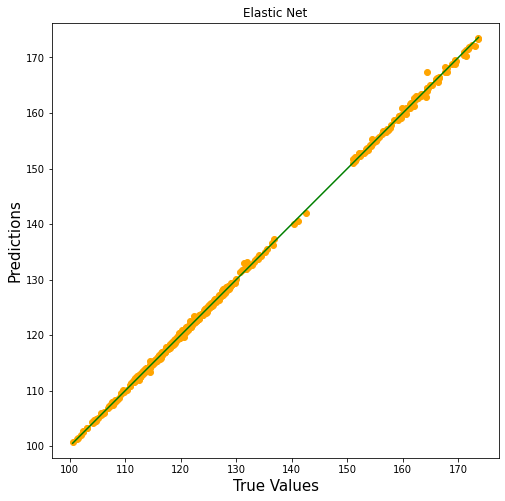

In [201]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, reg_pred, c='orange')

p1 = max(max(reg_pred), max(y_test))
p2 = min(min(reg_pred), min(y_test))
plt.plot([p1, p2], [p1, p2],'g-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Elastic Net")
plt.axis('equal')
plt.show()

<h5>XGBoost</h5>

In [203]:
clf = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=1, random_state=0)

In [204]:
clf_pred=clf.predict(X_test)
clf_pred

array([128.04957746, 115.86387873, 156.86695761, 154.28232811,
       131.23102082, 114.85412375, 128.04957746, 165.90095808,
       119.26932052, 107.11374897, 102.77678678, 105.48413892,
       152.61257587, 119.26932052, 132.07725446, 115.86387873,
       122.34736153, 115.34490432, 128.04957746, 105.48413892,
       126.73853122, 129.68804051, 122.34736153, 126.73853122,
       119.74702423, 111.99475239, 111.99475239, 111.70792874,
       158.58985484, 122.34736153, 118.68001975, 119.74702423,
       119.74702423, 132.33546631, 119.74702423, 106.14151027,
       114.04016004, 124.53825298, 132.86134023, 161.579256  ,
       168.19417452, 111.30252267, 126.73853122, 115.86387873,
       119.26932052, 118.68001975, 119.74702423, 120.71226819,
       115.86387873, 119.74702423, 128.86086921, 172.16378648,
       118.68001975, 161.579256  , 120.71226819, 128.04957746,
       111.99475239, 118.68001975, 124.53825298, 122.34736153,
       120.71226819, 114.04016004, 111.99475239, 120.71

MSE:-  0.9393207193134916
MAE:-  0.5923494649705033
Negative MAE: -0.631 (0.063)
R2:-  0.9968824067466857


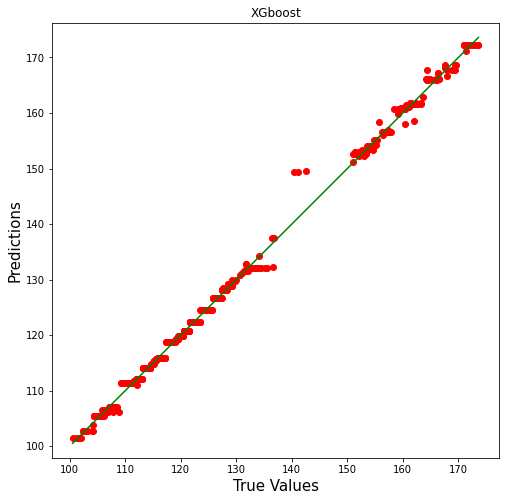

In [206]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print("MSE:- ",mean_squared_error(y_test,clf_pred))
print("MAE:- ",mean_absolute_error(y_test,clf_pred))
print('Negative MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("R2:- ",r2_score(y_test,clf_pred))

result = pd.DataFrame({'Actual': y_test, 'Predicted': clf_pred})
result

plt.figure(figsize=(8,8))
plt.scatter(y_test, clf_pred, c='red')

p1 = max(max(clf_pred), max(y_test))
p2 = min(min(clf_pred), min(y_test))
plt.plot([p1, p2], [p1, p2],'g-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("XGboost")
plt.axis('equal')
plt.show()

In [207]:
m1=r2_score(y_test,y_pred)
m2=r2_score(y_test,dt_pred)
m3=r2_score(y_test,reg_pred)
m4=r2_score(y_test,clf_pred)
mm=[m1,m2,m3,m4]
rs=pd.DataFrame(mm,index=['Random Forest','Decision Tree','Elastic Net','XGboost'],columns=['R2_Score'])
rs

,R2_Score
Random Forest,0.999929
Decision Tree,0.999923
Elastic Net,0.999682
XGboost,0.996882


In [208]:
max(rs['R2_Score'])


0.9999287483366391

<center><h2>As seen in those 4 models we've got the highest accuracy in Random Forest Algorithm.</h2></center>